In [2]:
library(Seurat)
library(SeuratDisk)
library(dplyr)
library(ggpubr)
library(ggplot2)

project <- Sys.getenv('WORKSPACE_NAMESPACE')
workspace <- Sys.getenv('WORKSPACE_NAME')
bucket <- Sys.getenv('WORKSPACE_BUCKET')

Loading required package: SeuratObject

Loading required package: sp


Attaching package: ‘SeuratObject’


The following object is masked from ‘package:base’:

    intersect


Registered S3 method overwritten by 'SeuratDisk':
  method            from  
  as.sparse.H5Group Seurat


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: ggplot2



# Dataframe from "bar_graph_ONLY_IMMUNE.ipynb"

In [2]:
df = read.csv("count_long.csv")[-1]
df


variable response value       
1   B        R        0.052562418 
2   B        R        0.287037037 
3   B        R        0.042726348 
4   B        R        0.056074766 
5   B        R        0.017412935 
6   B        R        0.002865330 
7   Macro    R        0.307490145 
8   Macro    R        0.231481481 
9   Macro    R        0.319430315 
10  Macro    R        0.352803738 
11  Macro    R        0.299751244 
12  Macro    R        0.383954155 
13  Mast     R        0.032851511 
14  Mast     R        0.009259259 
15  Mast     R        0.192268566 
16  Mast     R        0.046144860 
17  Mast     R        0.277363184 
18  Mast     R        0.085959885 
19  Mono     R        0.013140604 
20  Mono     R        0.027777778 
21  Mono     R        0.082400814 
22  Mono     R        0.068341121 
23  Mono     R        0.187810945 
24  Mono     R        0.048710602 
25  NK       R        0.045992116 
26  NK       R        0.000000000 
27  NK       R        0.000000000 
28  NK       R        0.001168224 
29  NK       R        0.000000000 
30  NK       R        0.000000000 
⋮   ⋮        ⋮        ⋮           
83  NK       NR       0.0621118012
84  NK       NR       0.0263522885
85  NK       NR       0.0246913580
86  NK       NR       0.0000000000
87  NK       NR       0.0009891197
88  NK       NR       0.0000000000
89  Plasma   NR       0.0000000000
90  Plasma   NR       0.0678426052
91  Plasma   NR       0.0285714286
92  Plasma   NR       0.0402219140
93  Plasma   NR       0.0070546737
94  Plasma   NR       0.0275862069
95  Plasma   NR       0.0296735905
96  Plasma   NR       0.0000000000
97  T        NR       0.1363636364
98  T        NR       0.4857530529
99  T        NR       0.4881987578
100 T        NR       0.3800277393
101 T        NR       0.2469135802
102 T        NR       0.0827586207
103 T        NR       0.3264094955
104 T        NR       0.2500000000
105 T-memory NR       0.0000000000
106 T-memory NR       0.0000000000
107 T-memory NR       0.0000000000
108 T-memory NR       0.0000000000
109 T-memory NR       0.0000000000
110 T-memory NR       0.0000000000
111 T-memory NR       0.0138476756
112 T-memory NR       0.0000000000

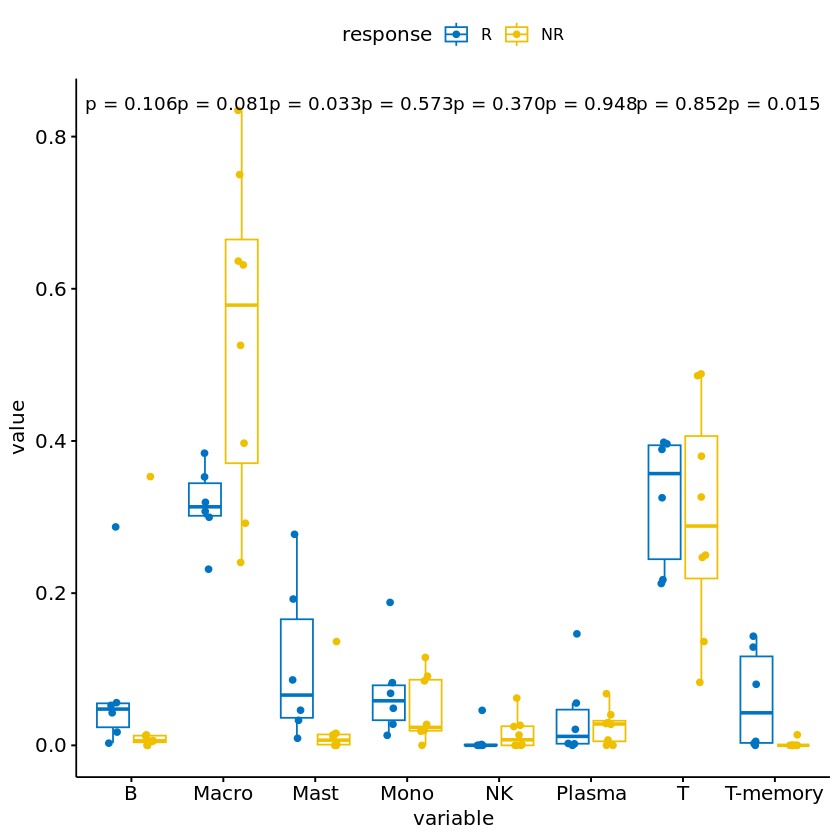

In [8]:
library(forcats)
df<- df %>%
    mutate(response= fct_relevel(response, "R","NR"))
p<-  ggboxplot(df, x = "variable", y = "value",
          color = "response", palette = "jco",
          add = "jitter")
p + stat_compare_means(aes(group = response), label = "p.format")

In [18]:
df = read.csv("python_myeloid_count_long.csv")[-1]
df


variable          response value      
1   Mast              R        0.074652778
2   Mast              R        0.033333333
3   Mast              R        0.167808219
4   Mast              R        0.057387057
5   Mast              R        0.334943639
6   Mast              R        0.117647059
7   Mono              R        0.045138889
8   Mono              R        0.116666667
9   Mono              R        0.011986301
10  Mono              R        0.023199023
11  Mono              R        0.117552335
12  Mono              R        0.037433155
13  TAM M1 HLA-DPB1+  R        0.380208333
14  TAM M1 HLA-DPB1+  R        0.233333333
15  TAM M1 HLA-DPB1+  R        0.203767123
16  TAM M1 HLA-DPB1+  R        0.406593407
17  TAM M1 HLA-DPB1+  R        0.035426731
18  TAM M1 HLA-DPB1+  R        0.112299465
19  TAM M2 MRC1+      R        0.046875000
20  TAM M2 MRC1+      R        0.016666667
21  TAM M2 MRC1+      R        0.154109589
22  TAM M2 MRC1+      R        0.172161172
23  TAM M2 MRC1+      R        0.307568438
24  TAM M2 MRC1+      R        0.417112299
25  TAM M2 PPARG+     R        0.008680556
26  TAM M2 PPARG+     R        0.000000000
27  TAM M2 PPARG+     R        0.275684932
28  TAM M2 PPARG+     R        0.148962149
29  TAM M2 PPARG+     R        0.006441224
30  TAM M2 PPARG+     R        0.058823529
⋮   ⋮                 ⋮        ⋮          
97  TAM PARP14+ SPP1+ NR       0.634615385
98  TAM PARP14+ SPP1+ NR       0.823266219
99  TAM PARP14+ SPP1+ NR       0.889434889
100 TAM PARP14+ SPP1+ NR       0.636363636
101 TAM PARP14+ SPP1+ NR       0.325779037
102 TAM PARP14+ SPP1+ NR       0.000000000
103 TAM SKAP1+ SOX5+  NR       0.238095238
104 TAM SKAP1+ SOX5+  NR       0.034232365
105 TAM SKAP1+ SOX5+  NR       0.250000000
106 TAM SKAP1+ SOX5+  NR       0.123042506
107 TAM SKAP1+ SOX5+  NR       0.081081081
108 TAM SKAP1+ SOX5+  NR       0.348484848
109 TAM SKAP1+ SOX5+  NR       0.362606232
110 TAM SKAP1+ SOX5+  NR       0.000000000
111 cDC1              NR       0.000000000
112 cDC1              NR       0.000000000
113 cDC1              NR       0.032051282
114 cDC1              NR       0.035794183
115 cDC1              NR       0.002457002
116 cDC1              NR       0.000000000
117 cDC1              NR       0.042492918
118 cDC1              NR       0.333333333
119 pDC               NR       0.000000000
120 pDC               NR       0.000000000
121 pDC               NR       0.000000000
122 pDC               NR       0.000000000
123 pDC               NR       0.000000000
124 pDC               NR       0.007575758
125 pDC               NR       0.048158640
126 pDC               NR       0.000000000

Scale for x is already present.
Adding another scale for x, which will replace the existing scale.


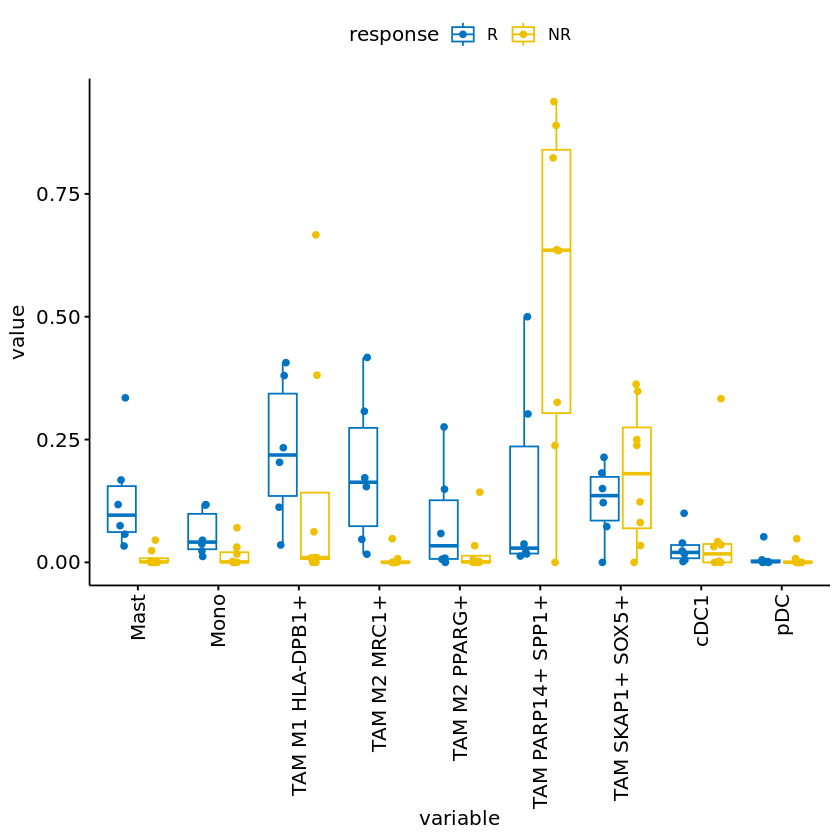

In [24]:
p +scale_x_discrete(guide = guide_axis(angle = 90))


For the statistical analysis, please look at "[Fig3_myeloid_Spp1+_stat_analysis.ipynb](https://github.com/CarvalhoFilipeL/MIBC_tumor_myeloid/blob/main/Fig3_myeloid_Spp1%2B_stat_analysis.ipynb)" Fig3_myeloid_Spp1+_stat_analysis.ipynb

Warning message:
“Unknown file type: h5ad”
Warning message:
“'assay' not set, setting to 'RNA'”
Creating h5Seurat file for version 3.1.5.9900

Adding X as scale.data

Adding raw/X as data

Adding raw/X as counts

Adding meta.features from raw/var

Adding dispersions from scaled feature-level metadata

Adding dispersions_norm from scaled feature-level metadata

Adding highly_variable from scaled feature-level metadata

Adding highly_variable_intersection from scaled feature-level metadata

Adding highly_variable_nbatches from scaled feature-level metadata

Adding mean from scaled feature-level metadata

Adding means from scaled feature-level metadata

Merging mt from scaled feature-level metadata

Merging n_cells from scaled feature-level metadata

Merging ribo from scaled feature-level metadata

Adding std from scaled feature-level metadata

Adding X_pca as cell embeddings for pca

Adding X_pca_harmony as cell embeddings for pca_harmony

Adding X_umap as cell embeddings for umap

Addin

An object of class Seurat 
14568 features across 5486 samples within 1 assay 
Active assay: RNA (14568 features, 0 variable features)
 3 layers present: counts, data, scale.data
 3 dimensional reductions calculated: pca, pca_harmony, umap

PC_ 1 
Positive:  SLC24A3, KIT, IL18R1, MEIS2, PBX1 
Negative:  DOCK4, SLC16A10, SAT1, CTSB, TYMP 
PC_ 2 
Positive:  KIT, NTM, CDK15, SLC24A3, TNIK 
Negative:  SRGAP1, NR4A1, NR4A3, AREG, S100A6 
PC_ 3 
Positive:  FTL, LGALS1, TMSB10, RPLP1, RPL35A 
Negative:  FKBP5, HDAC9, SRGAP1, PSTPIP2, MS4A4E 
PC_ 4 
Positive:  SYTL3, AREG, NR4A3, CCSER1, RGS1 
Negative:  F13A1, COLEC12, MAMDC2, FN1, LYVE1 
PC_ 5 
Positive:  JAML, SLC38A1, FLT3, TMSB10, PPP1R16B 
Negative:  ELL2, TFRC, SAMD4A, ZNF331, MMP19 


Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
20:40:52 UMAP embedding parameters a = 0.9922 b = 1.112

20:40:52 Read 5486 rows and found 10 numeric columns

20:40:52 Using Annoy for neighbor search, n_neighbors = 30

20:40:52 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

20:40:53 Writing NN index file to temp file /tmp/RtmpKjdkx6/file691fef6cf

20:40:53 Searching Annoy index using 1 thread, search_k = 3000

20:40:55 Annoy recall = 100%

20:40:56 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 30

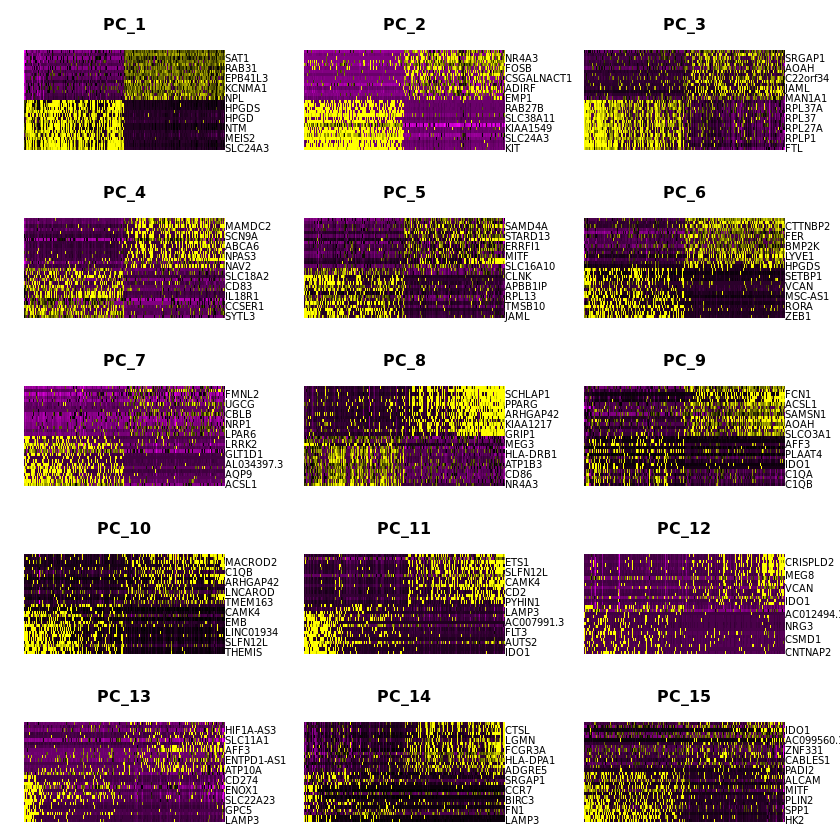

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 5486
Number of edges: 186800

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8999
Number of communities: 9
Elapsed time: 1 seconds
ATAGCATGTAGCTGGT-1-0 TCCTCAATCATTAGCA-1-0 GCTAACCCAACGTGCT-1-0 
                   7                    8                    2 
GGATTTATCATCGTTT-1-0 CTGCTACTCAAGACTC-1-0 
                   2                    0 
Levels: 0 1 2 3 4 5 6 7 8


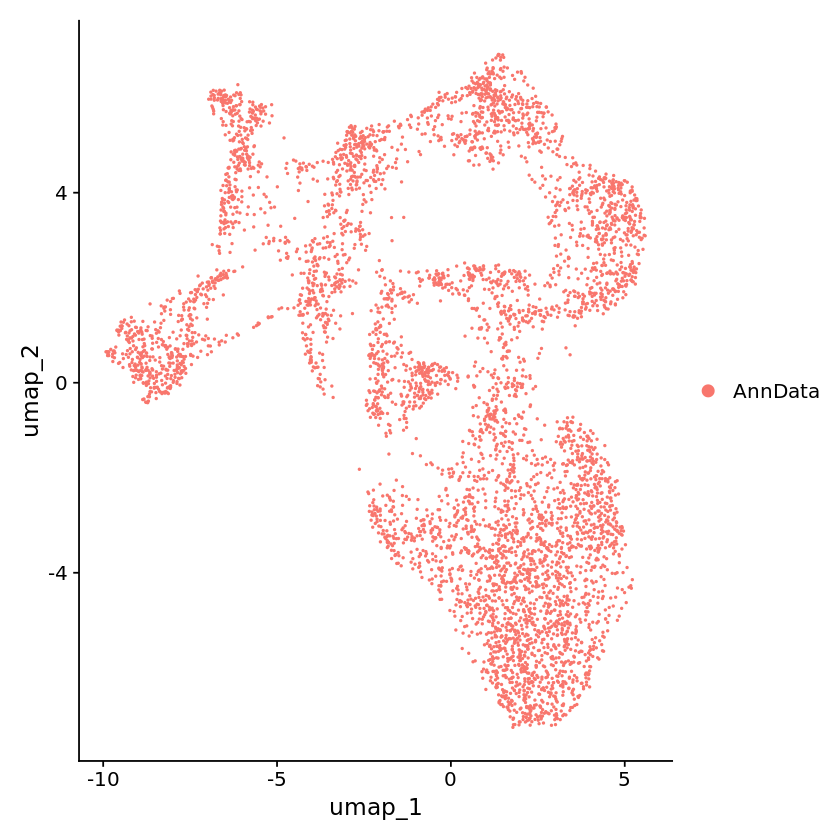

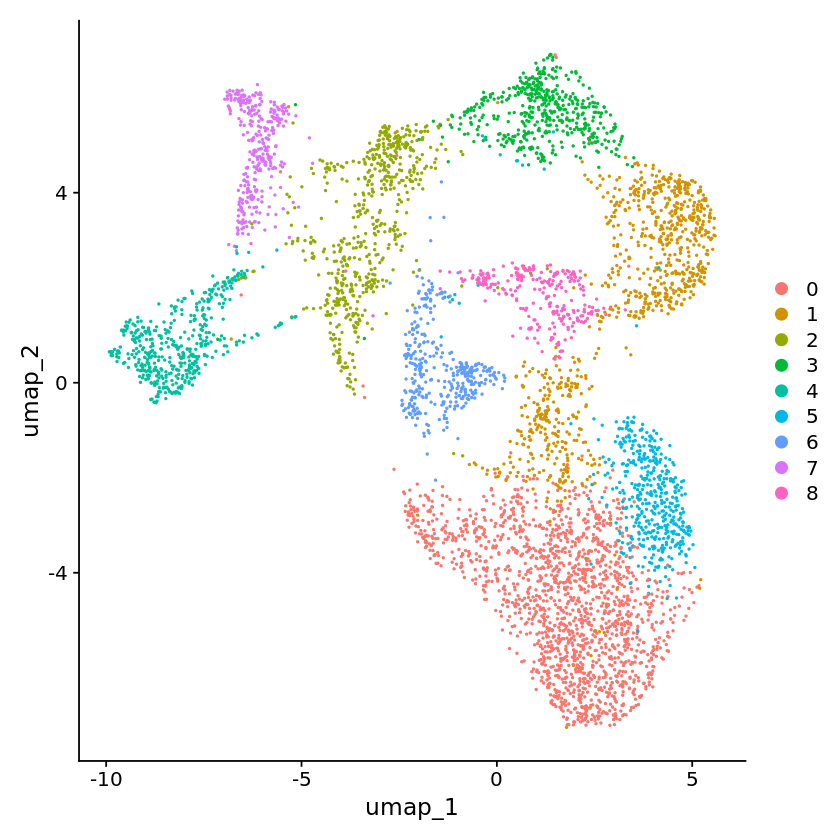

In [2]:
Convert("harmonized_myeloid_only_annotated.h5ad", dest = "h5seurat", overwrite = TRUE)
macro <- LoadH5Seurat("harmonized_myeloid_only_annotated.h5seurat",meta.data = FALSE, misc = FALSE)
macro

print(macro[["pca"]], dims = 1:5, nfeatures = 5)
DimHeatmap(macro, dims = 1:15, cells = 500, balanced = TRUE)
macro<-RunUMAP(macro, dims = 1:10)


DimPlot(macro, reduction = "umap")
macro <- FindNeighbors(macro, dims = 1:10)
macro <- FindClusters(macro, resolution = 0.35)
print(head(Idents(macro), 5))
DimPlot(macro, reduction = "umap")

In [4]:
macro@meta.data
write.csv(macro@meta.data,"macro_metadata.csv")
system(paste0("gsutil cp -r ", "macro_metadata.csv ", bucket, "/cellranger_output_directory/bladder/harmony/"),intern=TRUE)

RNA_snn_res.0.35 seurat_clusters
ATAGCATGTAGCTGGT-1-0  7                7              
TCCTCAATCATTAGCA-1-0  8                8              
GCTAACCCAACGTGCT-1-0  2                2              
GGATTTATCATCGTTT-1-0  2                2              
CTGCTACTCAAGACTC-1-0  0                0              
CATCCTTCATCAGTAT-1-0  2                2              
CGTTAGTAGGCATTAC-1-0  7                7              
GGACCGAAGGCCAATT-1-0  8                8              
AAAGCACCAAGGTACG-1-0  1                1              
ACTCGCTTCTTTGTAC-1-0  2                2              
AAGTAGCCACTGACTA-1-0  1                1              
GCTGACATCCGTAAAC-1-0  5                5              
TTGCACACACAACAAA-1-0  8                8              
CAAACTGGTCCGTAGG-1-0  1                1              
AGCTAACTCCCTTGCG-1-0  8                8              
GAAGTGATCACCTGTC-1-0  1                1              
TTTCTTGCACCTCGCT-1-0  1                1              
ATTAGGTGTTTAGCTC-1-0  2                2              
ATGGCTGTCTGCAACG-1-0  2                2              
GTTGCATAGAACAAGT-1-0  5                5              
GTTAAGCTCCAAGTTA-1-0  8                8              
CCGCTAAAGGGCTTTG-1-1  0                0              
CCACAATAGTCGCAAT-1-1  1                1              
GGGTTACGTGTCCTGC-1-1  0                0              
GGCCTAATCATTGTCT-1-1  0                0              
TTGGATTCATAATGAG-1-1  0                0              
CCTCAAACACCATATG-1-1  0                0              
CCCTCATAGCTTGCTC-1-1  0                0              
GGGAATATCATAACCA-1-1  2                2              
ATAACGACACCACAAC-1-1  0                0              
⋮                     ⋮                ⋮              
TACTGGCCAGTCTAAT-1-13 6                6              
TAGGCTTAGTTGCGTG-1-13 3                3              
AGTTGTCAGACACTTA-1-13 4                4              
CAAACTGGTTAAGTGT-1-13 3                3              
CAAAGCGCACAAGCCT-1-13 6                6              
GCTGACATCGTCAAGT-1-13 2                2              
CGCCACACATGATTGT-1-13 3                3              
TTTGGCTGTAAGCACC-1-13 6                6              
AAACATGCATGAATCT-1-13 5                5              
CGCTGTGCACCAGCAT-1-13 5                5              
ACTAACCAGTTCCTGC-1-13 3                3              
ACTAACGGTTAATGAC-1-13 3                3              
TGGACTAGTCATAAGT-1-13 3                3              
ATATAGGCAAACTGTT-1-13 4                4              
ACCATAATCATTAGCA-1-13 3                3              
GCCCTCATCCTCGATC-1-13 3                3              
ATGTTTGAGGACCAGG-1-13 3                3              
CAATCTAAGTTACTTC-1-13 4                4              
ATTATGGTCTTGCATT-1-13 4                4              
TTAAGGACATGTTGCA-1-13 3                3              
AGTCTTGCAGTCTAGC-1-13 6                6              
AATTGGACAGTTTGGC-1-13 4                4              
ACTTATCTCGTTAGTA-1-13 3                3              
CTGCTCCCAGCACCAT-1-13 3                3              
AGCACAGCAACAGCCT-1-13 3                3              
GCCCGTTGTAATTAGC-1-13 3                3              
TGTGTGAGTGTCCTGC-1-13 4                4              
GCAATATGTGAGGTAG-1-13 3                3              
TCCTTGCAGTCAGTAC-1-13 3                3              
TATGGCCCATCATGTG-1-13 5                5

character(0)

In [5]:
macro.markers <- FindAllMarkers(macro, only.pos = TRUE, min.pct = 0.25, logfc.threshold = 0.25)
macro.markers %>%
    group_by(cluster) %>%
    slice_max(n = 2, order_by = avg_log2FC)

Calculating cluster 0

Calculating cluster 1

Calculating cluster 2

Calculating cluster 3

Calculating cluster 4

Calculating cluster 5

Calculating cluster 6

Calculating cluster 7



p_val         avg_log2FC pct.1 pct.2 p_val_adj     cluster gene      
1  1.525574e-254 4.359585   0.374 0.027 2.222456e-250 0       SPP1      
2  6.230783e-238 4.052802   0.412 0.059 9.077005e-234 0       CTSL      
3   4.944560e-87 2.746050   0.426 0.165  7.203235e-83 1       NR4A3     
4  7.779440e-135 2.562666   0.424 0.105 1.133309e-130 1       PALD1     
5  5.615206e-172 4.041446   0.302 0.026 8.180231e-168 2       PRICKLE2  
6  9.890678e-146 3.885425   0.253 0.020 1.440874e-141 2       PDLIM3    
7  8.272161e-285 4.766860   0.508 0.043 1.205088e-280 3       MAMDC2    
8  4.762351e-242 4.665549   0.477 0.049 6.937793e-238 3       MPPED2    
9   0.000000e+00 7.218226   0.411 0.008  0.000000e+00 4       SLC38A11  
10  0.000000e+00 6.583759   0.913 0.046  0.000000e+00 4       KIT       
11 4.879828e-217 5.018549   0.333 0.015 7.108933e-213 5       FCN1      
12 1.111210e-129 4.169454   0.350 0.040 1.618811e-125 5       GLT1D1    
13  0.000000e+00 5.795849   0.553 0.020  0.000000e+00 6       AC019117.2
14  0.000000e+00 5.518932   0.462 0.012  0.000000e+00 6       RASEF     
15 1.594196e-193 5.802520   0.314 0.013 2.322424e-189 7       IDO1      
16 1.215494e-132 4.922806   0.252 0.014 1.770731e-128 7       GNAO1

Warning message in DoHeatmap(macro, features = top20$gene):
“The following features were omitted as they were not found in the scale.data slot for the RNA assay: PTPN3, ANXA10, SPTSSB, CYP24A1, ARG2, CAPN8, CYP3A5, AC044810.2, AC114812.2, FA2H, RASEF”


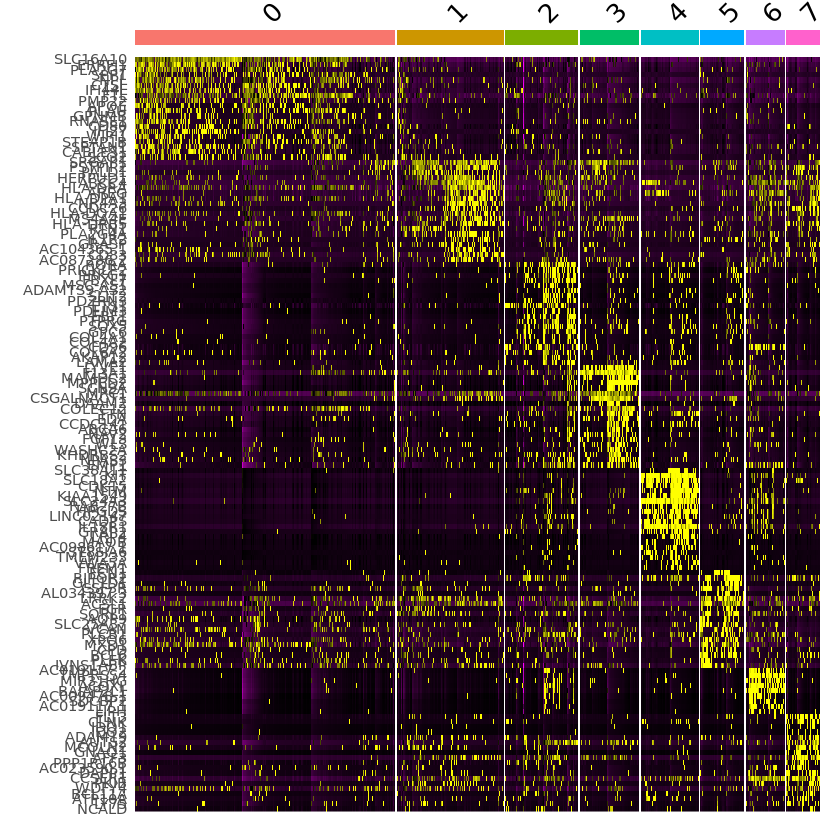

In [8]:
macro.markers %>%
    group_by(cluster) %>%
    top_n(n = 20, wt = avg_log2FC) -> top20
DoHeatmap(macro, features = top20$gene) + NoLegend()

Warning message in DoHeatmap(macro, features = top100$gene):
“The following features were omitted as they were not found in the scale.data slot for the RNA assay: NAP1L1, LRRK1, TMEM131, ARHGAP5, SRPX2, PTPN3, MARK1, LINC01748, ALDH1L1, ANXA10, SPTSSB, CYP24A1, ARG2, CAPN8, CYP3A5, AC044810.2, AC114812.2, FA2H, RASEF, USP15, SESN1, EPS8, STK39, TEAD1, UBA6, SGPL1, VPS8, GRB2”


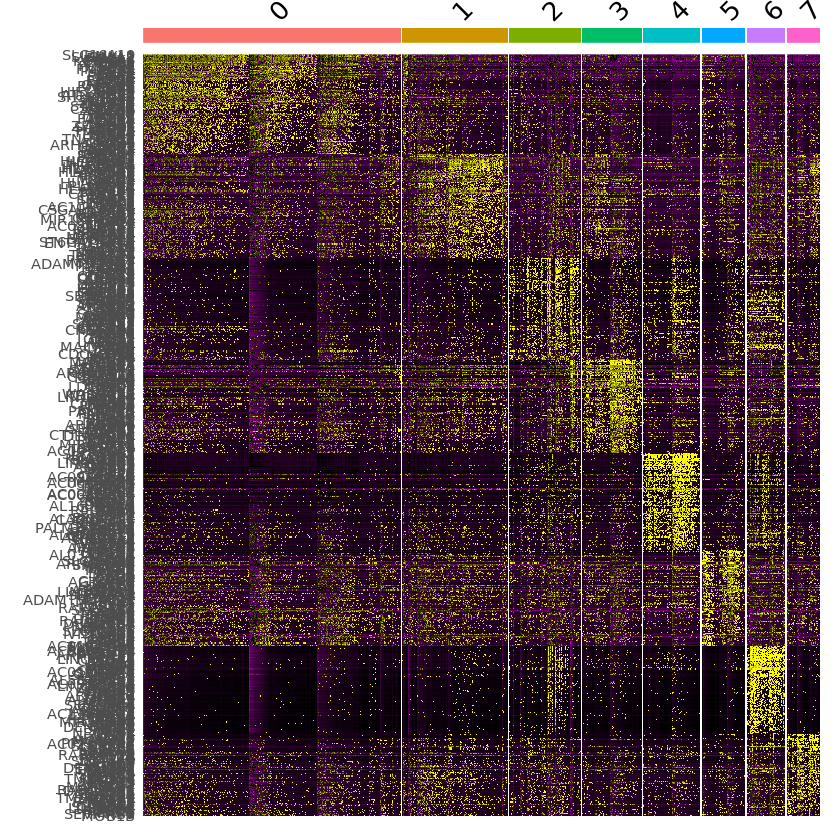

In [7]:
macro.markers %>%
    group_by(cluster) %>%
    top_n(n = 100, wt = avg_log2FC) -> top100
DoHeatmap(macro, features = top100$gene) + NoLegend()

In [8]:
macro.markers %>%
    group_by(cluster) %>%
    top_n(n = 100, wt = avg_log2FC) -> top100
top100

write.csv(top100,"myeloid_heatmap100_genes.csv")

system(paste0("gsutil cp -r myeloid_heatmap100_genes.csv ", bucket),intern=TRUE)

p_val         avg_log2FC pct.1 pct.2 p_val_adj     cluster gene     
1    0.000000e+00 3.451300   0.806 0.163  0.000000e+00 0       SLC16A10 
2    0.000000e+00 2.431248   0.802 0.298  0.000000e+00 0       DMXL2    
3    0.000000e+00 2.364378   0.700 0.205  0.000000e+00 0       SLC11A1  
4    0.000000e+00 2.354559   0.812 0.375  0.000000e+00 0       FMNL2    
5    0.000000e+00 2.220168   0.785 0.368  0.000000e+00 0       ABCA1    
6    0.000000e+00 1.673905   0.878 0.504  0.000000e+00 0       DOCK4    
7   4.050231e-293 2.186669   0.715 0.249 5.900377e-289 0       KCNMA1   
8   4.190352e-293 3.740239   0.528 0.104 6.104505e-289 0       ERRFI1   
9   8.739423e-270 2.009913   0.766 0.391 1.273159e-265 0       CTSB     
10  2.771333e-265 2.186376   0.665 0.227 4.037277e-261 0       TYMP     
11  2.489630e-258 1.660575   0.798 0.466 3.626893e-254 0       HIF1A    
12  2.976435e-255 3.461987   0.440 0.061 4.336070e-251 0       PLA2G7   
13  1.525574e-254 4.359585   0.374 0.027 2.222456e-250 0       SPP1     
14  7.494729e-253 2.760767   0.530 0.122 1.091832e-248 0       NPL      
15  2.463313e-246 1.562428   0.838 0.559 3.588555e-242 0       FNDC3B   
16  6.230783e-238 4.052802   0.412 0.059 9.077005e-234 0       CTSL     
17  6.894656e-228 1.963214   0.671 0.280 1.004414e-223 0       PARP14   
18  9.690586e-227 1.545919   0.678 0.293 1.411725e-222 0       GLUL     
19  1.668200e-218 2.733445   0.416 0.067 2.430234e-214 0       IFI44L   
20  6.637750e-207 1.841886   0.684 0.326 9.669874e-203 0       TNS3     
21  4.627133e-201 1.714701   0.688 0.349 6.740808e-197 0       PDE4B    
22  2.265922e-199 2.626635   0.583 0.233 3.300995e-195 0       FTL      
23  6.573281e-190 2.011409   0.624 0.272 9.575956e-186 0       TFRC     
24  3.664122e-186 2.239850   0.518 0.171 5.337893e-182 0       RALA     
25  1.603513e-176 1.943036   0.520 0.171 2.335997e-172 0       EPSTI1   
26  3.945579e-168 2.506673   0.432 0.119 5.747920e-164 0       PMP22    
27  1.669411e-151 3.971943   0.266 0.030 2.431999e-147 0       APOE     
28  2.972268e-150 2.721686   0.297 0.045 4.330000e-146 0       PLAU     
29  7.473589e-148 2.409560   0.385 0.099 1.088752e-143 0       ABCG1    
30  9.059749e-148 3.048841   0.311 0.056 1.319824e-143 0       GPNMB    
⋮   ⋮             ⋮          ⋮     ⋮     ⋮             ⋮       ⋮        
771 1.192279e-22  2.025112   0.314 0.118 1.736912e-18  7       KIF2A    
772 1.336259e-22  1.684040   0.394 0.175 1.946663e-18  7       TBC1D9   
773 2.292076e-22  2.804077   0.259 0.089 3.339096e-18  7       LINC01374
774 4.672999e-21  1.483528   0.358 0.149 6.807624e-17  7       CEP128   
775 8.744187e-21  1.656577   0.405 0.184 1.273853e-16  7       RUNX2    
776 2.925118e-20  1.776317   0.350 0.155 4.261312e-16  7       TMEM131L 
777 1.955010e-19  2.064123   0.285 0.113 2.848059e-15  7       RUNX3    
778 1.313213e-18  1.837769   0.391 0.195 1.913089e-14  7       ITGA4    
779 1.786361e-18  1.628065   0.314 0.132 2.602370e-14  7       N4BP2    
780 1.993957e-18  1.777080   0.285 0.114 2.904796e-14  7       BCL2L11  
781 3.600994e-18  1.503655   0.529 0.338 5.245928e-14  7       ENTPD1   
782 5.418833e-18  1.780873   0.277 0.110 7.894156e-14  7       NAA25    
783 6.162793e-18  1.633645   0.566 0.366 8.977957e-14  7       CERS6    
784 6.808501e-18  1.480193   0.394 0.201 9.918625e-14  7       FUT8     
785 7.093268e-18  1.493539   0.270 0.105 1.033347e-13  7       DBNL     
786 7.506034e-18  1.686473   0.314 0.134 1.093479e-13  7       CARD11   
787 1.358404e-17  1.484759   0.263 0.101 1.978923e-13  7       BCL6     
788 1.525934e-17  2.190425   0.354 0.167 2.222980e-13  7       SLC20A1  
789 1.656012e-17  1.498424   0.394 0.191 2.412478e-13  7       NAP1L1   
790 2.751180e-17  1.442882   0.460 0.250 4.007919e-13  7       GPR183   
791 2.725206e-16  1.449288   0.281 0.116 3.970080e-12  7       GRASP    
792 3.841660e-16  1.844811   0.255 0.103 5.596531e-12  7       LDLRAD3  
793 6.627392e-14  1.987923   0.299 0.144 9.654785e-10  7      

character(0)

In [9]:
macro.markers %>%
    group_by(cluster) %>%
    top_n(n = 50, wt = avg_log2FC) -> top50
top50

write.csv(top50,"myeloid_heatmap50_genes.csv")

system(paste0("gsutil cp -r myeloid_heatmap50_genes.csv ", bucket),intern=TRUE)

p_val         avg_log2FC pct.1 pct.2 p_val_adj     cluster gene     
1    0.000000e+00 3.451300   0.806 0.163  0.000000e+00 0       SLC16A10 
2    0.000000e+00 2.431248   0.802 0.298  0.000000e+00 0       DMXL2    
3    0.000000e+00 2.364378   0.700 0.205  0.000000e+00 0       SLC11A1  
4    0.000000e+00 2.354559   0.812 0.375  0.000000e+00 0       FMNL2    
5    0.000000e+00 2.220168   0.785 0.368  0.000000e+00 0       ABCA1    
6   4.050231e-293 2.186669   0.715 0.249 5.900377e-289 0       KCNMA1   
7   4.190352e-293 3.740239   0.528 0.104 6.104505e-289 0       ERRFI1   
8   8.739423e-270 2.009913   0.766 0.391 1.273159e-265 0       CTSB     
9   2.771333e-265 2.186376   0.665 0.227 4.037277e-261 0       TYMP     
10  2.976435e-255 3.461987   0.440 0.061 4.336070e-251 0       PLA2G7   
11  1.525574e-254 4.359585   0.374 0.027 2.222456e-250 0       SPP1     
12  7.494729e-253 2.760767   0.530 0.122 1.091832e-248 0       NPL      
13  6.230783e-238 4.052802   0.412 0.059 9.077005e-234 0       CTSL     
14  6.894656e-228 1.963214   0.671 0.280 1.004414e-223 0       PARP14   
15  1.668200e-218 2.733445   0.416 0.067 2.430234e-214 0       IFI44L   
16  2.265922e-199 2.626635   0.583 0.233 3.300995e-195 0       FTL      
17  6.573281e-190 2.011409   0.624 0.272 9.575956e-186 0       TFRC     
18  3.664122e-186 2.239850   0.518 0.171 5.337893e-182 0       RALA     
19  1.603513e-176 1.943036   0.520 0.171 2.335997e-172 0       EPSTI1   
20  3.945579e-168 2.506673   0.432 0.119 5.747920e-164 0       PMP22    
21  1.669411e-151 3.971943   0.266 0.030 2.431999e-147 0       APOE     
22  2.972268e-150 2.721686   0.297 0.045 4.330000e-146 0       PLAU     
23  7.473589e-148 2.409560   0.385 0.099 1.088752e-143 0       ABCG1    
24  9.059749e-148 3.048841   0.311 0.056 1.319824e-143 0       GPNMB    
25  1.753149e-146 2.532310   0.347 0.075 2.553988e-142 0       RNASE1   
26  1.643348e-145 2.314124   0.341 0.071 2.394030e-141 0       IL2RA    
27  7.032661e-140 2.834790   0.280 0.042 1.024518e-135 0       CD80     
28  3.258825e-139 2.020903   0.460 0.162 4.747456e-135 0       XAF1     
29  2.790183e-135 2.240877   0.386 0.111 4.064739e-131 0       GNB4     
30  2.127970e-133 2.192238   0.408 0.129 3.100027e-129 0       HIF1A-AS3
⋮   ⋮             ⋮          ⋮     ⋮     ⋮             ⋮       ⋮        
371 4.111467e-56  2.557030   0.288 0.052 5.989585e-52  7       DAPK2    
372 1.501956e-53  2.884300   0.588 0.236 2.188049e-49  7       WDFY4    
373 8.276894e-52  2.963264   0.288 0.056 1.205778e-47  7       BCL11A   
374 3.825050e-51  2.369251   0.354 0.083 5.572332e-47  7       ATP8A1   
375 2.633313e-50  3.321515   0.354 0.091 3.836211e-46  7       ATP10A   
376 1.820662e-49  3.250609   0.328 0.077 2.652341e-45  7       LY75     
377 1.861155e-49  2.232238   0.420 0.119 2.711331e-45  7       CCDC6    
378 5.175245e-47  2.658394   0.270 0.054 7.539297e-43  7       ITGAE    
379 5.640636e-45  2.314918   0.365 0.098 8.217279e-41  7       ZBTB46   
380 9.795186e-44  2.440395   0.427 0.138 1.426963e-39  7       JAML     
381 1.158149e-43  2.037683   0.438 0.140 1.687192e-39  7       SLC41A2  
382 3.315367e-42  2.910103   0.252 0.052 4.829827e-38  7       NCALD    
383 7.031326e-40  2.084882   0.529 0.205 1.024324e-35  7       SEL1L3   
384 1.573396e-38  2.493864   0.372 0.115 2.292123e-34  7       ID2      
385 2.660903e-37  1.952091   0.350 0.101 3.876404e-33  7       TOX      
386 4.546119e-37  2.246799   0.318 0.087 6.622787e-33  7       SAMD12   
387 2.605489e-35  1.943715   0.442 0.168 3.795677e-31  7       ARHGAP5  
388 1.003281e-34  2.174369   0.387 0.134 1.461580e-30  7       NUBPL    
389 5.465750e-34  2.098117   0.434 0.168 7.962504e-30  7       PAK1     
390 2.490760e-33  2.131981   0.318 0.095 3.628540e-29  7       TENM4    
391 4.402441e-33  1.993876   0.522 0.253 6.413476e-29  7       SIPA1L3  
392 5.994027e-32  2.206833   0.263 0.069 8.732099e-28  7       BID      
393 6.344281e-30  2.022203   0.365 0.132 9.242348e-26  7      

character(0)

Warning message in DoHeatmap(subset(macro, downsample = 100), features = top50$gene, :
“The following features were omitted as they were not found in the scale.data slot for the RNA assay: ARHGAP5, PTPN3, LINC01748, ALDH1L1, ANXA10, SPTSSB, CYP24A1, ARG2, CAPN8, CYP3A5, AC044810.2, AC114812.2, FA2H, RASEF, TEAD1, SGPL1”


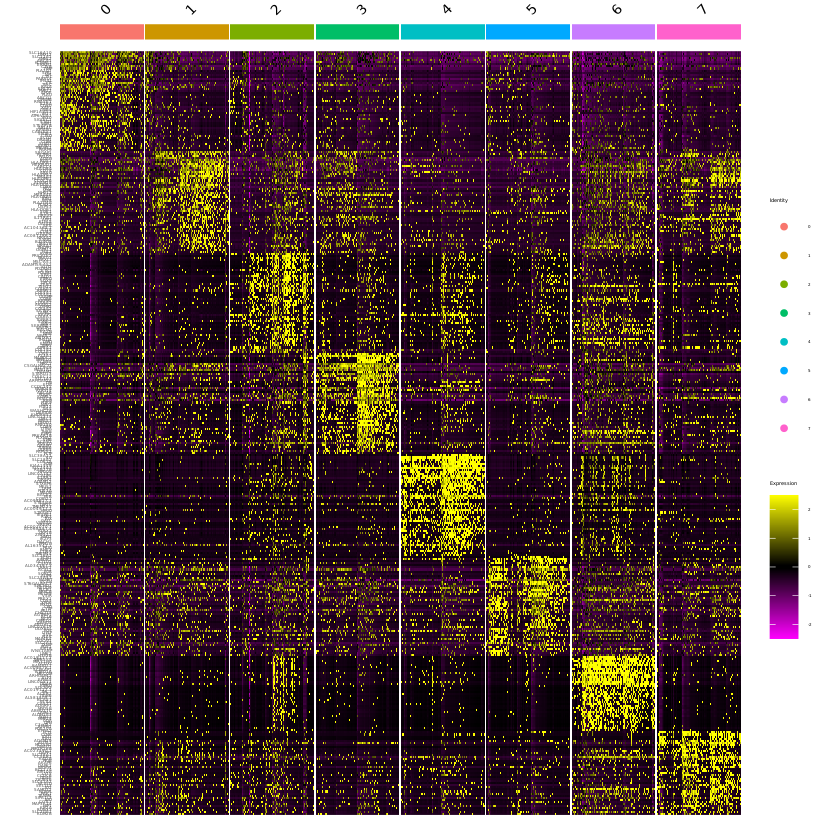

In [10]:
DoHeatmap(subset(macro , downsample = 100), features = top50$gene, size = 3)+ 
    theme(text = element_text(size = 3))

As of Seurat v5, we recommend using AggregateExpression to perform pseudo-bulk analysis.
This message is displayed once per session.
Centering and scaling data matrix

Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.
Warning message:
“Removed 391 rows containing missing values or values outside the scale range
(`geom_point()`).”


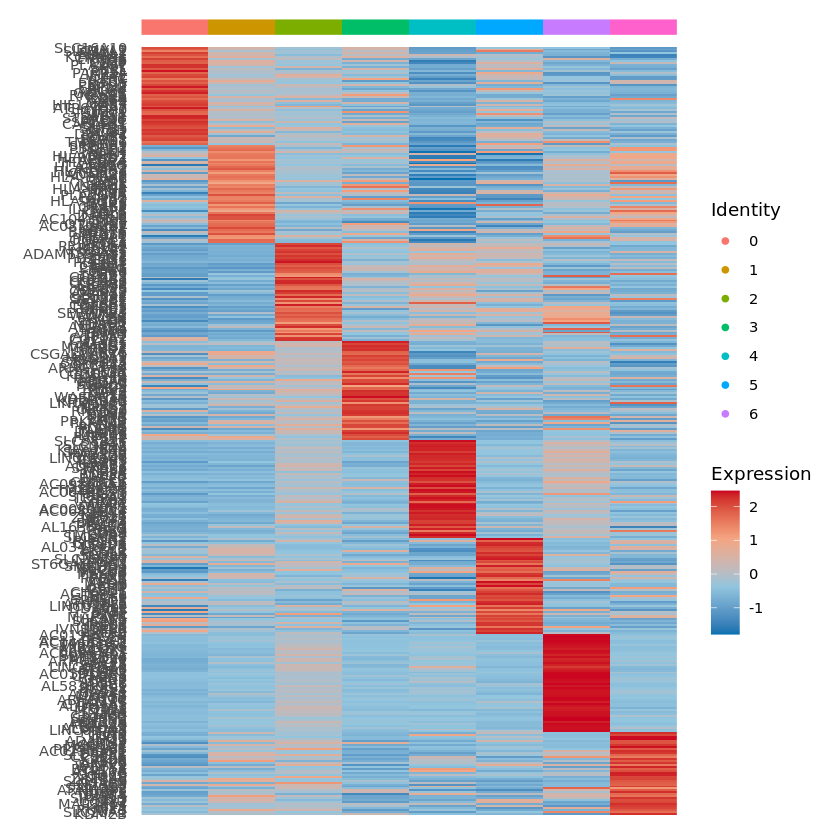

In [11]:
combined_averages <- AverageExpression(macro, return.seurat = TRUE) 
DoHeatmap(combined_averages, features = top50$gene, label = FALSE ,draw.lines = FALSE)  +  
        scale_fill_gradientn(colors = rev(RColorBrewer::brewer.pal(n =4, name = "RdBu")))

In [ ]:
macro <- subset(macro, idents = c("0","1", "2", "3", "6"))
DimPlot(macro)

As of Seurat v5, we recommend using AggregateExpression to perform pseudo-bulk analysis.
This message is displayed once per session.
Centering and scaling data matrix

Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.
Warning message:
“Removed 391 rows containing missing values or values outside the scale range
(`geom_point()`).”


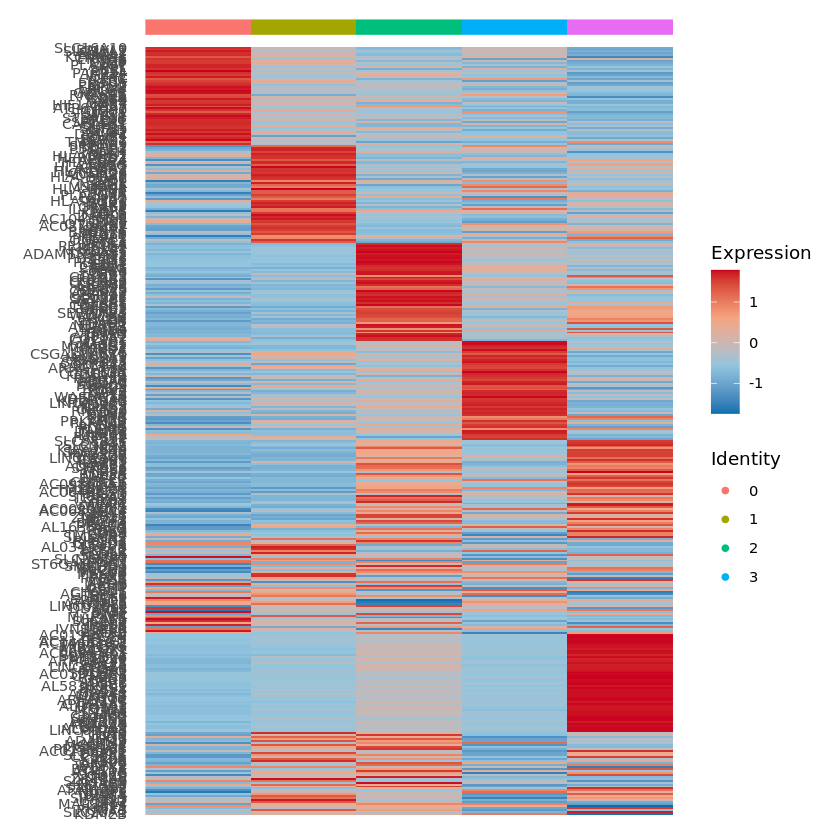

In [12]:
combined_averages <- AverageExpression(macro, return.seurat = TRUE) 
DoHeatmap(combined_averages, features = top50$gene, label = FALSE ,draw.lines = FALSE)  +  
        scale_fill_gradientn(colors = rev(RColorBrewer::brewer.pal(n =4, name = "RdBu")))

In [13]:
M1M2<-c('IL1B','TNF','CXCL9','CXCL10','CXCL11','FCGR1A','IRF1','HLA-DPB1','CD86','MARCO','IL2RA','CSCR4','IL27RA','CSF1R','CCL2','CCL7','CCL17','CCL18','CCL23','CTSD','FN1','GAS7','HMOX1','PPARG','LIPA','CD209','CLEC7A','F13A1','MAF','MS4A5A')

Warning message in DoHeatmap(combined_averages, features = M1M2, label = FALSE, :
“The following features were omitted as they were not found in the scale.data slot for the RNA assay: MS4A5A, CD209, CCL23, CCL18, CCL17, CCL7, CCL2, CSCR4, FCGR1A, CXCL11, CXCL10, CXCL9, TNF”
Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.
Warning message:
“Removed 17 rows containing missing values or values outside the scale range
(`geom_point()`).”


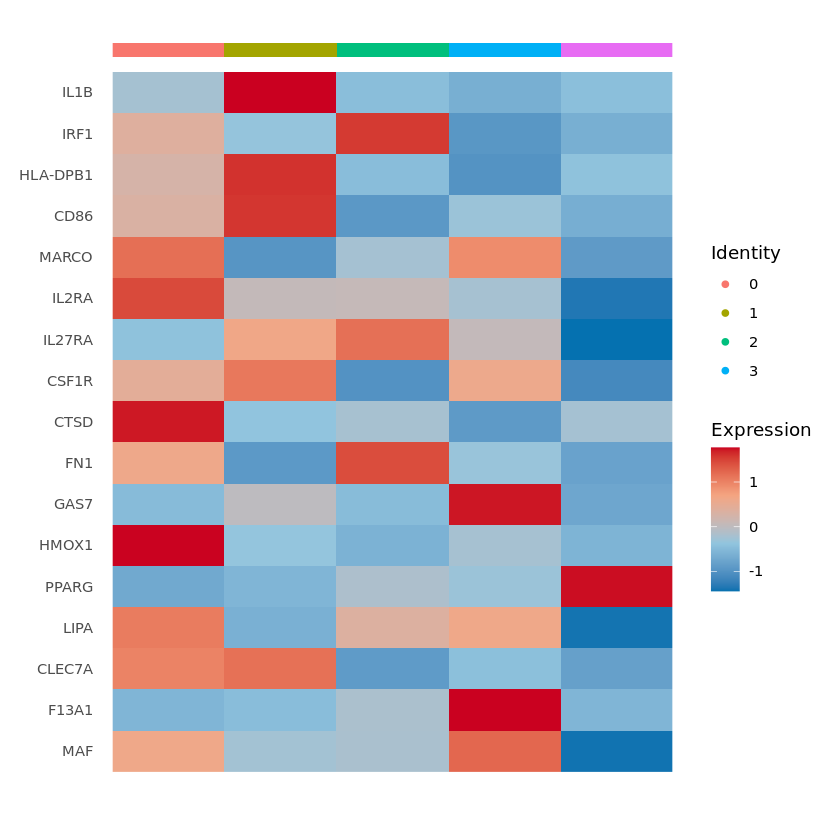

In [14]:
DoHeatmap(combined_averages, features = M1M2, label = FALSE ,draw.lines = FALSE)  +  
        scale_fill_gradientn(colors = rev(RColorBrewer::brewer.pal(n =4, name = "RdBu")))

In [16]:
plot <- DoHeatmap(subset(macro, downsample = 100), features = top50$gene, size = 3)+ 
    theme(text = element_text(size = 3))
ggplot2::ggsave(filename = "myeloid_heatmap50.pdf", plot = plot) # can add additional parameters similar to png 
system(paste0("gsutil cp -r myeloid_heatmap50.pdf ", bucket, "/figures/"),intern=TRUE)

Warning message in DoHeatmap(subset(macro, downsample = 100), features = top50$gene, :
“The following features were omitted as they were not found in the scale.data slot for the RNA assay: ARHGAP5, PTPN3, LINC01748, ALDH1L1, ANXA10, SPTSSB, CYP24A1, ARG2, CAPN8, CYP3A5, AC044810.2, AC114812.2, FA2H, RASEF, TEAD1, SGPL1”
Saving 6.67 x 6.67 in image


character(0)

In [13]:
macro.markers %>%
    group_by(cluster) %>%
    top_n(n = 100, wt = avg_log2FC) -> top100

In [18]:
saveRDS(macro, file = "harmonized_macro_only_annotated.RDS")
system(paste0("gsutil cp -r harmonized_macro_only_annotated.RDS ", bucket), intern=TRUE)


character(0)

In [14]:
library(msigdbr)
library(fgsea)
library(dplyr)
library(ggplot2)

msigdbr_show_species()

Warning message:
“'msigdbr_show_species' is deprecated.
Use 'msigdbr_species' instead.
See help("Deprecated")”


[1] "Anolis carolinensis"             "Bos taurus"                     
 [3] "Caenorhabditis elegans"          "Canis lupus familiaris"         
 [5] "Danio rerio"                     "Drosophila melanogaster"        
 [7] "Equus caballus"                  "Felis catus"                    
 [9] "Gallus gallus"                   "Homo sapiens"                   
[11] "Macaca mulatta"                  "Monodelphis domestica"          
[13] "Mus musculus"                    "Ornithorhynchus anatinus"       
[15] "Pan troglodytes"                 "Rattus norvegicus"              
[17] "Saccharomyces cerevisiae"        "Schizosaccharomyces pombe 972h-"
[19] "Sus scrofa"                      "Xenopus tropicalis"

In [15]:
m_df<- msigdbr(species = "Homo sapiens", category = "H")

#head(m_df)
fgsea_sets<- m_df %>% split(x = .$gene_symbol, f = .$gs_name)
fgsea_sets$HALLMARK_INTERFERON_ALPHA_RESPONSE

[1] "ADAR"     "B2M"      "B2M"      "BATF2"    "BST2"     "C1S"     
  [7] "CASP1"    "CASP8"    "CCRL2"    "CD47"     "CD74"     "CMPK2"   
 [13] "CMTR1"    "CNP"      "CSF1"     "CXCL10"   "CXCL11"   "DDX60"   
 [19] "DHX58"    "EIF2AK2"  "ELF1"     "EPSTI1"   "GBP2"     "GBP4"    
 [25] "GMPR"     "HELZ2"    "HERC6"    "HLA-C"    "HLA-C"    "HLA-C"   
 [31] "HLA-C"    "HLA-C"    "HLA-C"    "HLA-C"    "IFI27"    "IFI27"   
 [37] "IFI30"    "IFI35"    "IFI44"    "IFI44L"   "IFIH1"    "IFIT2"   
 [43] "IFIT3"    "IFITM1"   "IFITM2"   "IFITM3"   "IL15"     "IL4R"    
 [49] "IL7"      "IRF1"     "IRF2"     "IRF7"     "IRF7"     "IRF9"    
 [55] "IRF9"     "ISG15"    "ISG20"    "LAMP3"    "LAP3"     "LGALS3BP"
 [61] "LPAR6"    "LY6E"     "LY6E"     "MOV10"    "MVB12A"   "MX1"     
 [67] "NCOA7"    "NMI"      "NUB1"     "OAS1"     "OASL"     "OGFR"    
 [73] "PARP12"   "PARP14"   "PARP9"    "PLSCR1"   "PNPT1"    "PROCR"   
 [79] "PSMA3"    "PSMB8"    "PSMB8"    "PSMB8"    "PSMB8"    "PSMB8"   
 [85] "PSMB8"    "PSMB8"    "PSMB8"    "PSMB9"    "PSMB9"    "PSMB9"   
 [91] "PSMB9"    "PSMB9"    "PSMB9"    "PSMB9"    "PSMB9"    "PSME1"   
 [97] "PSME1"    "PSME2"    "PSME2"    "RIPK2"    "RNF31"    "RNF31"   
[103] "RSAD2"    "RTP4"     "SAMD9"    "SAMD9L"   "SELL"     "SLC25A28"
[109] "SP110"    "STAT2"    "TAP1"     "TAP1"     "TAP1"     "TAP1"    
[115] "TAP1"     "TAP1"     "TAP1"     "TAP1"     "TDRD7"    "TENT5A"  
[121] "TMEM140"  "TRAFD1"   "TRIM14"   "TRIM21"   "TRIM25"   "TRIM26"  
[127] "TRIM26"   "TRIM26"   "TRIM26"   "TRIM26"   "TRIM26"   "TRIM26"  
[133] "TRIM26"   "TRIM26"   "TRIM5"    "TXNIP"    "UBA7"     "UBE2L6"  
[139] "USP18"    "WARS1"

In [16]:
macro@meta.data$response<- rownames(macro@meta.data)
macro@meta.data

RNA_snn_res.0.35 seurat_clusters response             
ATAGCATGTAGCTGGT-1-0  7                7               ATAGCATGTAGCTGGT-1-0 
GCTAACCCAACGTGCT-1-0  2                2               GCTAACCCAACGTGCT-1-0 
GGATTTATCATCGTTT-1-0  2                2               GGATTTATCATCGTTT-1-0 
CTGCTACTCAAGACTC-1-0  0                0               CTGCTACTCAAGACTC-1-0 
CATCCTTCATCAGTAT-1-0  2                2               CATCCTTCATCAGTAT-1-0 
CGTTAGTAGGCATTAC-1-0  7                7               CGTTAGTAGGCATTAC-1-0 
AAAGCACCAAGGTACG-1-0  1                1               AAAGCACCAAGGTACG-1-0 
ACTCGCTTCTTTGTAC-1-0  2                2               ACTCGCTTCTTTGTAC-1-0 
AAGTAGCCACTGACTA-1-0  1                1               AAGTAGCCACTGACTA-1-0 
GCTGACATCCGTAAAC-1-0  5                5               GCTGACATCCGTAAAC-1-0 
CAAACTGGTCCGTAGG-1-0  1                1               CAAACTGGTCCGTAGG-1-0 
GAAGTGATCACCTGTC-1-0  1                1               GAAGTGATCACCTGTC-1-0 
TTTCTTGCACCTCGCT-1-0  1                1               TTTCTTGCACCTCGCT-1-0 
ATTAGGTGTTTAGCTC-1-0  2                2               ATTAGGTGTTTAGCTC-1-0 
ATGGCTGTCTGCAACG-1-0  2                2               ATGGCTGTCTGCAACG-1-0 
GTTGCATAGAACAAGT-1-0  5                5               GTTGCATAGAACAAGT-1-0 
CCGCTAAAGGGCTTTG-1-1  0                0               CCGCTAAAGGGCTTTG-1-1 
CCACAATAGTCGCAAT-1-1  1                1               CCACAATAGTCGCAAT-1-1 
GGGTTACGTGTCCTGC-1-1  0                0               GGGTTACGTGTCCTGC-1-1 
GGCCTAATCATTGTCT-1-1  0                0               GGCCTAATCATTGTCT-1-1 
TTGGATTCATAATGAG-1-1  0                0               TTGGATTCATAATGAG-1-1 
CCTCAAACACCATATG-1-1  0                0               CCTCAAACACCATATG-1-1 
CCCTCATAGCTTGCTC-1-1  0                0               CCCTCATAGCTTGCTC-1-1 
GGGAATATCATAACCA-1-1  2                2               GGGAATATCATAACCA-1-1 
ATAACGACACCACAAC-1-1  0                0               ATAACGACACCACAAC-1-1 
CCGCACACATCCCGCT-1-1  0                0               CCGCACACATCCCGCT-1-1 
CGGGTCTAGCACTAGT-1-1  0                0               CGGGTCTAGCACTAGT-1-1 
GCCCTCATCTATCGCC-1-1  0                0               GCCCTCATCTATCGCC-1-1 
AATTGACGTAACGTGC-1-1  1                1               AATTGACGTAACGTGC-1-1 
TGACCAAGTCCTTCTC-1-1  1                1               TGACCAAGTCCTTCTC-1-1 
⋮                     ⋮                ⋮               ⋮                    
AATAGCTGTTTATCTG-1-13 2                2               AATAGCTGTTTATCTG-1-13
AGTTGCAGTTAGGCTA-1-13 2                2               AGTTGCAGTTAGGCTA-1-13
TGAAACTGTGAGGTAG-1-13 1                1               TGAAACTGTGAGGTAG-1-13
TGAACAGAGACTTATG-1-13 3                3               TGAACAGAGACTTATG-1-13
TTCGGTACAGGACCTT-1-13 3                3               TTCGGTACAGGACCTT-1-13
AACTCACAGGTAAGGC-1-13 2                2               AACTCACAGGTAAGGC-1-13
GTATTCAAGTGAAGTG-1-13 3                3               GTATTCAAGTGAAGTG-1-13
CACAGGCTCTCAATTC-1-13 3                3               CACAGGCTCTCAATTC-1-13
ACCGGCTAGGCGCACT-1-13 3                3               ACCGGCTAGGCGCACT-1-13
GGTACAAAGGAAACTG-1-13 3                3               GGTACAAAGGAAACTG-1-13
TAGGCTTAGTTGCGTG-1-13 3                3               TAGGCTTAGTTGCGTG-1-13
CAAACTGGTTAAGTGT-1-13 3                3               CAAACTGGTTAAGTGT-1-13
GCTGACATCGTCAAGT-1-13 2                2               GCTGACATCGTCAAGT-1-13
CGCCACACATGATTGT-1-13 3                3               CGCCACACATGATTGT-1-13
AAACATGCATGAATCT-1-13 5                5               AAACATGCATGAATCT-1-13
CGCTGTGCACCAGCAT-1-13 5                5               CGCTGTGCACCAGCAT-1-13
ACTAACCAGTTCCTGC-1-13 3                3               ACTAACCAGTTCCTGC-1-13
ACTAACGGTTAATGAC-1-13 3                3               ACTAACGGTTAATGAC-1-13
TGGACTAGTCATAAGT-1-13 3                3               TGGACTAGTCATAAGT-1-13
ACCATAATCATTAGCA-1-13 3                3               ACCATAATCATTAGCA-1-13
GCCCTCATCCTCGATC-1

In [17]:
## change to response
#macro@meta.data$response<- rownames(macro@meta.data)
#macro@meta.data

nr <- c("-0","-1","-2","-3","-4","-5","-6","-7")
r <- c("-8","-9","-10","-11","-12","-13")

for (i in nr) {
  macro@meta.data[endsWith(macro@meta.data$response,(i)),]$response <- 1
}

for (i in r) {
  macro@meta.data[endsWith(macro@meta.data$response,(i)),]$response <- 0
}

macro@meta.data

library(presto)

#macro.genes <- wilcoxauc(macro, 'seurat_clusters')
macro.genes <- wilcoxauc(macro, 'response')
head(macro.genes)

RNA_snn_res.0.35 seurat_clusters response
ATAGCATGTAGCTGGT-1-0  7                7               1       
GCTAACCCAACGTGCT-1-0  2                2               1       
GGATTTATCATCGTTT-1-0  2                2               1       
CTGCTACTCAAGACTC-1-0  0                0               1       
CATCCTTCATCAGTAT-1-0  2                2               1       
CGTTAGTAGGCATTAC-1-0  7                7               1       
AAAGCACCAAGGTACG-1-0  1                1               1       
ACTCGCTTCTTTGTAC-1-0  2                2               1       
AAGTAGCCACTGACTA-1-0  1                1               1       
GCTGACATCCGTAAAC-1-0  5                5               1       
CAAACTGGTCCGTAGG-1-0  1                1               1       
GAAGTGATCACCTGTC-1-0  1                1               1       
TTTCTTGCACCTCGCT-1-0  1                1               1       
ATTAGGTGTTTAGCTC-1-0  2                2               1       
ATGGCTGTCTGCAACG-1-0  2                2               1       
GTTGCATAGAACAAGT-1-0  5                5               1       
CCGCTAAAGGGCTTTG-1-1  0                0               1       
CCACAATAGTCGCAAT-1-1  1                1               1       
GGGTTACGTGTCCTGC-1-1  0                0               1       
GGCCTAATCATTGTCT-1-1  0                0               1       
TTGGATTCATAATGAG-1-1  0                0               1       
CCTCAAACACCATATG-1-1  0                0               1       
CCCTCATAGCTTGCTC-1-1  0                0               1       
GGGAATATCATAACCA-1-1  2                2               1       
ATAACGACACCACAAC-1-1  0                0               1       
CCGCACACATCCCGCT-1-1  0                0               1       
CGGGTCTAGCACTAGT-1-1  0                0               1       
GCCCTCATCTATCGCC-1-1  0                0               1       
AATTGACGTAACGTGC-1-1  1                1               1       
TGACCAAGTCCTTCTC-1-1  1                1               1       
⋮                     ⋮                ⋮               ⋮       
AATAGCTGTTTATCTG-1-13 2                2               0       
AGTTGCAGTTAGGCTA-1-13 2                2               0       
TGAAACTGTGAGGTAG-1-13 1                1               0       
TGAACAGAGACTTATG-1-13 3                3               0       
TTCGGTACAGGACCTT-1-13 3                3               0       
AACTCACAGGTAAGGC-1-13 2                2               0       
GTATTCAAGTGAAGTG-1-13 3                3               0       
CACAGGCTCTCAATTC-1-13 3                3               0       
ACCGGCTAGGCGCACT-1-13 3                3               0       
GGTACAAAGGAAACTG-1-13 3                3               0       
TAGGCTTAGTTGCGTG-1-13 3                3               0       
CAAACTGGTTAAGTGT-1-13 3                3               0       
GCTGACATCGTCAAGT-1-13 2                2               0       
CGCCACACATGATTGT-1-13 3                3               0       
AAACATGCATGAATCT-1-13 5                5               0       
CGCTGTGCACCAGCAT-1-13 5                5               0       
ACTAACCAGTTCCTGC-1-13 3                3               0       
ACTAACGGTTAATGAC-1-13 3                3               0       
TGGACTAGTCATAAGT-1-13 3                3               0       
ACCATAATCATTAGCA-1-13 3                3               0       
GCCCTCATCCTCGATC-1-13 3                3               0       
ATGTTTGAGGACCAGG-1-13 3                3               0       
TTAAGGACATGTTGCA-1-13 3                3               0       
ACTTATCTCGTTAGTA-1-13 3                3               0       
CTGCTCCCAGCACCAT-1-13 3                3               0       
AGCACAGCAACAGCCT-1-13 3                3               0       
GCCCGTTGTAATTAGC-1-13 3                3               0       
GCAATATGTGAGGTAG-1-13 3                3               0       
TCCTTGCAGTCAGTAC-1-13 3                3               0       
TATGGCCCATCATGTG-1-13 5                5               0

Loading required package: Rcpp

Loading required package: data.table


Attaching package: ‘data.table’


The following objects are masked from ‘package:dplyr’:

    between, first, last




feature    group avgExpr     logFC         statistic auc       pval        
1 AL627309.5 0     0.012268332 -0.0078240804 2379916   0.4979133 1.809475e-01
2 LINC01409  0     0.089158503  0.0539561495 2454700   0.5135591 3.903336e-07
3 LINC01128  0     0.142762402  0.0354133402 2417275   0.5057293 1.343807e-01
4 LINC00115  0     0.011809278  0.0007997288 2382941   0.4985462 2.519720e-01
5 FAM41C     0     0.002662761 -0.0010239277 2390622   0.5001531 8.128288e-01
6 SAMD11     0     0.006865857  0.0041656783 2396570   0.5013976 8.968881e-02
  padj         pct_in    pct_out  
1 2.714699e-01 0.8457711 1.2615643
2 1.903709e-06 4.6766169 1.9764508
3 2.129734e-01 7.4129353 6.3498738
4 3.541806e-01 0.5472637 0.8410429
5 8.645802e-01 0.1990050 0.1682086
6 1.521448e-01 0.4477612 0.1682086

In [18]:
dplyr::count(macro.genes, group)

group n    
1 0     14568
2 1     14568

In [20]:
#BiocManager::install("msigdbr")
library(msigdbr)
library(fgsea)
library(dplyr)
library(ggplot2)

msigdbr_show_species()

Warning message:
“'msigdbr_show_species' is deprecated.
Use 'msigdbr_species' instead.
See help("Deprecated")”


[1] "Anolis carolinensis"             "Bos taurus"                     
 [3] "Caenorhabditis elegans"          "Canis lupus familiaris"         
 [5] "Danio rerio"                     "Drosophila melanogaster"        
 [7] "Equus caballus"                  "Felis catus"                    
 [9] "Gallus gallus"                   "Homo sapiens"                   
[11] "Macaca mulatta"                  "Monodelphis domestica"          
[13] "Mus musculus"                    "Ornithorhynchus anatinus"       
[15] "Pan troglodytes"                 "Rattus norvegicus"              
[17] "Saccharomyces cerevisiae"        "Schizosaccharomyces pombe 972h-"
[19] "Sus scrofa"                      "Xenopus tropicalis"

In [21]:
m_df<- msigdbr(species = "Homo sapiens", category = "H")

#head(m_df)
fgsea_sets<- m_df %>% split(x = .$gene_symbol, f = .$gs_name)
fgsea_sets$HALLMARK_INTERFERON_ALPHA_RESPONSE

[1] "ADAR"     "B2M"      "B2M"      "BATF2"    "BST2"     "C1S"     
  [7] "CASP1"    "CASP8"    "CCRL2"    "CD47"     "CD74"     "CMPK2"   
 [13] "CMTR1"    "CNP"      "CSF1"     "CXCL10"   "CXCL11"   "DDX60"   
 [19] "DHX58"    "EIF2AK2"  "ELF1"     "EPSTI1"   "GBP2"     "GBP4"    
 [25] "GMPR"     "HELZ2"    "HERC6"    "HLA-C"    "HLA-C"    "HLA-C"   
 [31] "HLA-C"    "HLA-C"    "HLA-C"    "HLA-C"    "IFI27"    "IFI27"   
 [37] "IFI30"    "IFI35"    "IFI44"    "IFI44L"   "IFIH1"    "IFIT2"   
 [43] "IFIT3"    "IFITM1"   "IFITM2"   "IFITM3"   "IL15"     "IL4R"    
 [49] "IL7"      "IRF1"     "IRF2"     "IRF7"     "IRF7"     "IRF9"    
 [55] "IRF9"     "ISG15"    "ISG20"    "LAMP3"    "LAP3"     "LGALS3BP"
 [61] "LPAR6"    "LY6E"     "LY6E"     "MOV10"    "MVB12A"   "MX1"     
 [67] "NCOA7"    "NMI"      "NUB1"     "OAS1"     "OASL"     "OGFR"    
 [73] "PARP12"   "PARP14"   "PARP9"    "PLSCR1"   "PNPT1"    "PROCR"   
 [79] "PSMA3"    "PSMB8"    "PSMB8"    "PSMB8"    "PSMB8"    "PSMB8"   
 [85] "PSMB8"    "PSMB8"    "PSMB8"    "PSMB9"    "PSMB9"    "PSMB9"   
 [91] "PSMB9"    "PSMB9"    "PSMB9"    "PSMB9"    "PSMB9"    "PSME1"   
 [97] "PSME1"    "PSME2"    "PSME2"    "RIPK2"    "RNF31"    "RNF31"   
[103] "RSAD2"    "RTP4"     "SAMD9"    "SAMD9L"   "SELL"     "SLC25A28"
[109] "SP110"    "STAT2"    "TAP1"     "TAP1"     "TAP1"     "TAP1"    
[115] "TAP1"     "TAP1"     "TAP1"     "TAP1"     "TDRD7"    "TENT5A"  
[121] "TMEM140"  "TRAFD1"   "TRIM14"   "TRIM21"   "TRIM25"   "TRIM26"  
[127] "TRIM26"   "TRIM26"   "TRIM26"   "TRIM26"   "TRIM26"   "TRIM26"  
[133] "TRIM26"   "TRIM26"   "TRIM5"    "TXNIP"    "UBA7"     "UBE2L6"  
[139] "USP18"    "WARS1"

In [31]:
str(fgsea_sets)

List of 50
 $ HALLMARK_ADIPOGENESIS                     : chr [1:210] "ABCA1" "ABCB8" "ACAA2" "ACADL" ...
 $ HALLMARK_ALLOGRAFT_REJECTION              : chr [1:335] "AARS1" "ABCE1" "ABI1" "ACHE" ...
 $ HALLMARK_ANDROGEN_RESPONSE                : chr [1:102] "ABCC4" "ABHD2" "ACSL3" "ACTN1" ...
 $ HALLMARK_ANGIOGENESIS                     : chr [1:36] "APOH" "APP" "CCND2" "COL3A1" ...
 $ HALLMARK_APICAL_JUNCTION                  : chr [1:231] "ACTA1" "ACTB" "ACTC1" "ACTG1" ...
 $ HALLMARK_APICAL_SURFACE                   : chr [1:46] "ADAM10" "ADIPOR2" "ADIPOR2" "AFAP1L2" ...
 $ HALLMARK_APOPTOSIS                        : chr [1:183] "ADD1" "AIFM3" "ANKH" "ANXA1" ...
 $ HALLMARK_BILE_ACID_METABOLISM             : chr [1:114] "ABCA1" "ABCA2" "ABCA3" "ABCA4" ...
 $ HALLMARK_CHOLESTEROL_HOMEOSTASIS          : chr [1:77] "ABCA2" "ACAT2" "ACSS2" "ACTG1" ...
 $ HALLMARK_COAGULATION                      : chr [1:162] "A2M" "ACOX2" "ADAM9" "ADAM9" ...
 $ HALLMARK_COMPLEMENT                      

In [32]:
new_list = list('ALDH3A1', 'BST2',
                'CA2', 'CCNA1' ,'CD59', 'CXCL1' ,'CXCL10' ,'DAZ1' ,'DCN' ,'FLJ20035', 'FLJ38348', 'G1P2' ,
                'G1P3' ,'GALC', 'HERC6', 'HLA-B', 'HLA-G', 'HSD17B1' ,'IFI27',
                'IFI35', 'IFI44' ,'IFI44L' ,'IFIT1' ,'IFIT3', 'IFITM1', 'IGF2',
                'IRF7', 'LAMP3', 'LGALS3BP' ,'LY6E' ,'MCL1', 'MX1','MX2', 'OAS1',
                'OAS3', 'OASL' ,'PLSCR1', 'RAP2C' ,'ROBO1' ,'SERPINB2' ,'SH3YL1' ,'SLC6A15' ,'STAT1', 
                'THBS1' ,'TIMP3' ,'TncRNA', 'TRIM14' ,'USP18', 'ZNF273')
fgsea_sets$GENE_SET_49_IRDS<-new_list
fgsea_sets

$HALLMARK_ADIPOGENESIS
  [1] "ABCA1"    "ABCB8"    "ACAA2"    "ACADL"    "ACADM"    "ACADS"   
  [7] "ACLY"     "ACO2"     "ACOX1"    "ADCY6"    "ADIG"     "ADIPOQ"  
 [13] "ADIPOR2"  "ADIPOR2"  "AGPAT3"   "AIFM1"    "AK2"      "ALDH2"   
 [19] "ALDOA"    "ANGPT1"   "ANGPTL4"  "APLP2"    "APOE"     "ARAF"    
 [25] "ARL4A"    "ATL2"     "ATP1B3"   "ATP5PO"   "BAZ2A"    "BCKDHA"  
 [31] "BCL2L13"  "BCL6"     "C3"       "CAT"      "CAVIN1"   "CAVIN2"  
 [37] "CCNG2"    "CD151"    "CD302"    "CD36"     "CDKN2C"   "CHCHD10" 
 [43] "CHCHD10"  "CHCHD10"  "CHUK"     "CIDEA"    "CMBL"     "CMPK1"   
 [49] "COL15A1"  "COL4A1"   "COQ3"     "COQ5"     "COQ9"     "COX6A1"  
 [55] "COX7B"    "COX8A"    "CPT2"     "CRAT"     "CS"       "CYC1"    
 [61] "CYP4B1"   "DBT"      "DDT"      "DDT"      "DECR1"    "DGAT1"   
 [67] "DGAT1"    "DGAT1"    "DHCR7"    "DHRS7"    "DHRS7B"   "DLAT"    
 [73] "DLD"      "DNAJB9"   "DNAJC15"  "DRAM2"    "ECH1"     "ECH1"    
 [79] "ECHS1"    "ELMOD3"   "ELOVL6"   "ENPP2"    "EPHX2"    "ESRRA"   
 [85] "ESYT1"    "ETFB"     "FABP4"    "FAH"      "FZD4"     "G3BP2"   
 [91] "GADD45A"  "GBE1"     "GHITM"    "GPAM"     "GPAT4"    "GPD2"    
 [97] "GPHN"     "GPX3"     "GPX4"     "GRPEL1"   "HADH"     "HIBCH"   
[103] "HSPB8"    "IDH1"     "IDH3A"    "IDH3G"    "IFNGR1"   "IMMT"    
[109] "ITGA7"    "ITIH5"    "ITSN1"    "JAGN1"    "LAMA4"    "LEP"     
[115] "LIFR"     "LIPE"     "LPCAT3"   "LPL"      "LTC4S"    "LTC4S"   
[121] "MAP4K3"   "MCCC1"    "MDH2"     "ME1"      "MGLL"     "MGST3"   
[127] "MIGA2"    "MRAP"     "MRPL15"   "MTARC2"   "MTCH2"    "MTCH2"   
[133] "MYLK"     "NABP1"    "NDUFA5"   "NDUFAB1"  "NDUFB7"   "NDUFS3"  
[139] "NDUFS3"   "NKIRAS1"  "NMT1"     "OMD"      "ORM1"     "PDCD4"   
[145] "PEMT"     "PEX14"    "PFKFB3"   "PFKL"     "PGM1"     "PHLDB1"  
[151] "PHYH"     "PIM3"     "PLIN2"    "POR"      "PPARG"    "PPM1B"   
[157] "PPP1R15B" "PRDX3"    "PREB"     "PTCD3"    "PTGER3"   "QDPR"    
[163] "RAB34"    "REEP5"    "REEP6"    "RETN"     "RETSAT"   "RIOK3"   
[169] "RMDN3"    "RNF11"    "RREB1"    "RTN3"     "SAMM50"   "SCARB1"  
[175] "SCP2"     "SDHB"     "SDHC"     "SLC19A1"  "SLC1A5"   "SLC25A1" 
[181] "SLC25A10" "SLC27A1"  "SLC5A6"   "SLC66A3"  "SNCG"     "SOD1"    
[187] "SORBS1"   "SOWAHC"   "SPARCL1"  "SQOR"     "SSPN"     "STAT5A"  
[193] "STOM"     "SUCLG1"   "SULT1A1"  "TALDO1"   "TANK"     "TKT"     
[199] "TOB1"     "TST"      "UBC"      "UBQLN1"   "UCK1"     "UCP2"    
[205] "UQCR10"   "UQCR11"   "UQCRC1"   "UQCRQ"    "VEGFB"    "YWHAG"   

$HALLMARK_ALLOGRAFT_REJECTION
  [1] "AARS1"    "ABCE1"    "ABI1"     "ACHE"     "ACVR2A"   "AKT1"    
  [7] "APBB1"    "B2M"      "B2M"      "BCAT1"    "BCL10"    "BCL3"    
 [13] "BRCA1"    "C2"       "C2"       "C2"       "C2"       "C2"      
 [19] "C2"       "C2"       "CAPG"     "CARTPT"   "CCL11"    "CCL13"   
 [25] "CCL19"    "CCL2"     "CCL22"    "CCL4"     "CCL4"     "CCL4"    
 [31] "CCL5"     "CCL5"     "CCL7"     "CCND2"    "CCND3"    "CCR1"    
 [37] "CCR2"     "CCR5"     "CD1D"     "CD2"      "CD247"    "CD28"    
 [43] "CD3D"     "CD3E"     "CD3G"     "CD4"      "CD40"     "CD40LG"  
 [49] "CD47"     "CD7"      "CD74"     "CD79A"    "CD80"     "CD86"    
 [55] "CD8A"     "CD8B"     "CD96"     "CDKN2A"   "CFP"      "CRTAM"   
 [61] "CSF1"     "CSK"      "CTSS"     "CXCL13"   "CXCL9"    "CXCR3"   
 [67] "DARS1"    "DEGS1"    "DYRK3"    "EGFR"     "EIF3A"    "EIF3D"   
 [73] "EIF3J"    "EIF4G3"   "EIF5A"    "EIF5A"    "ELANE"    "ELANE"   
 [79] "ELF4"     "EREG"     "ETS1"     "F2"       "F2R"      "FAS"     
 [85] "FASLG"    "FCGR2B"   "FGR"      "FLNA"     "FYB1"     "GALNT1"  
 [91] "GBP2"     "GCNT1"    "GLMN"     "GPR65"    "GZMA"     "GZMB"    
 [97] "HCLS1"    "HDAC9"    "HIF1A"    "HLA-A"    "HLA-A"    "HLA-A"   
[103] "HLA-A"    "HLA-A"    "HLA-A"    "HLA-A"    "HLA-A"    "HLA-DMA" 
[109] "HLA-DMA"  "HLA-DMA"  "HLA-DMA"  "HLA-DMA"  "HLA-DMA"  "HLA-DMA" 
[115] "HLA-DMA"  "HLA-DMB"  "HLA-DMB"  "HLA-DMB"  "HLA-DMB

In [22]:
macro.genes %>%
  #dplyr::filter(group == "0") %>%
  arrange(desc(logFC), desc(auc)) %>%
  head(n = 10)

feature  group avgExpr  logFC    statistic auc       pval         
1  SLC16A10 1     2.701520 2.116288 3858252   0.8072028 8.148380e-308
2  FKBP5    0     2.732508 2.100639 4022669   0.8416013  0.000000e+00
3  SLC11A1  1     1.992056 1.626096 3727244   0.7797942 2.969880e-272
4  DMXL2    1     2.265407 1.494773 3715782   0.7773960 7.628468e-241
5  SRGAP1   0     1.691652 1.409482 3677126   0.7693085 5.683494e-278
6  HIF1A    1     2.482177 1.388826 3670920   0.7680101 2.801014e-216
7  ZBTB16   0     1.384449 1.318958 3550952   0.7429113 3.470344e-293
8  ABCA1    1     2.230867 1.274356 3546020   0.7418793 1.421396e-180
9  PDE4D    0     1.587393 1.256912 3413205   0.7140925 1.488293e-189
10 ERRFI1   1     1.467161 1.237780 3398441   0.7110036 8.878410e-184
   padj          pct_in   pct_out  
1  5.935280e-304 74.72666 21.293532
2   0.000000e+00 82.38806 27.375946
3  8.653043e-269 66.73675 16.815920
4  1.852192e-237 74.93692 33.880597
5  2.069928e-274 63.38308 14.213625
6  4.533908e-213 77.62826 47.512438
7  1.685199e-289 50.94527  2.817494
8  1.035345e-177 73.25484 42.189055
9  1.667804e-186 53.63184 14.928511
10 8.083792e-181 50.16821 12.189055

In [23]:
allcluster.genes<- macro.genes %>%
  #dplyr::filter(group == "0") %>%
  arrange(desc(auc)) %>% 
  dplyr::select(feature, auc)

library(tibble)
ranks<- deframe(allcluster.genes)

head(ranks)

fgseaRes<- fgsea(fgsea_sets, stats = ranks, nperm = 1000)
fgseaResTidy <- fgseaRes %>%
  as_tibble() %>%
  arrange(desc(NES))


fgseaResTidy %>% 
  dplyr::select(-leadingEdge, -ES, -nMoreExtreme) %>% 
  arrange(padj) %>% 
  head()

FKBP5  SLC16A10   SLC11A1     DMXL2    SRGAP1     HIF1A 
0.8416013 0.8072028 0.7797942 0.7773960 0.7693085 0.7680101

Warning message in fgsea(fgsea_sets, stats = ranks, nperm = 1000):
“You are trying to run fgseaSimple. It is recommended to use fgseaMultilevel. To run fgseaMultilevel, you need to remove the nperm argument in the fgsea function call.”
Warning message in preparePathwaysAndStats(pathways, stats, minSize, maxSize, gseaParam, :
“There are ties in the preranked stats (5.64% of the list).
The order of those tied genes will be arbitrary, which may produce unexpected results.”
Warning message in preparePathwaysAndStats(pathways, stats, minSize, maxSize, gseaParam, :
“There are duplicate gene names, fgsea may produce unexpected results.”
Warning message in preparePathwaysAndStats(pathways, stats, minSize, maxSize, gseaParam, :
“All values in the stats vector are greater than zero and scoreType is "std", maybe you should switch to scoreType = "pos".”


pathway                                    pval        padj        NES     
1 HALLMARK_INTERFERON_GAMMA_RESPONSE         0.001410437 0.001796493 9.559682
2 HALLMARK_TNFA_SIGNALING_VIA_NFKB           0.001410437 0.001796493 8.441000
3 HALLMARK_EPITHELIAL_MESENCHYMAL_TRANSITION 0.001414427 0.001796493 8.247626
4 HALLMARK_HYPOXIA                           0.001392758 0.001796493 7.923788
5 HALLMARK_COMPLEMENT                        0.001430615 0.001796493 7.867030
6 HALLMARK_UV_RESPONSE_DN                    0.001468429 0.001796493 7.836243
  size
1 177 
2 176 
3 162 
4 165 
5 155 
6 136

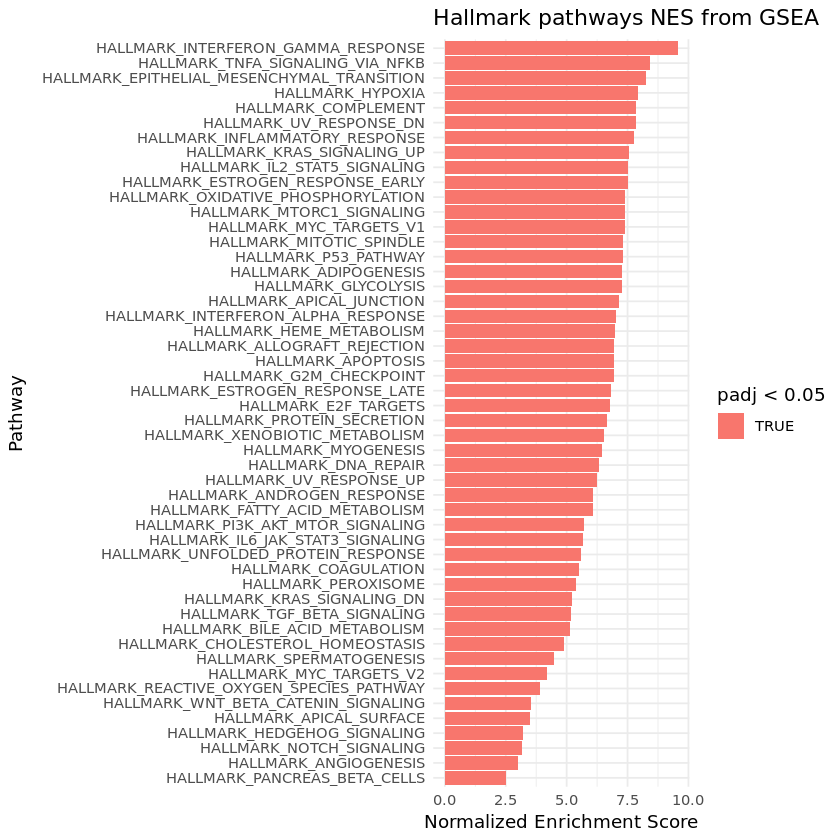

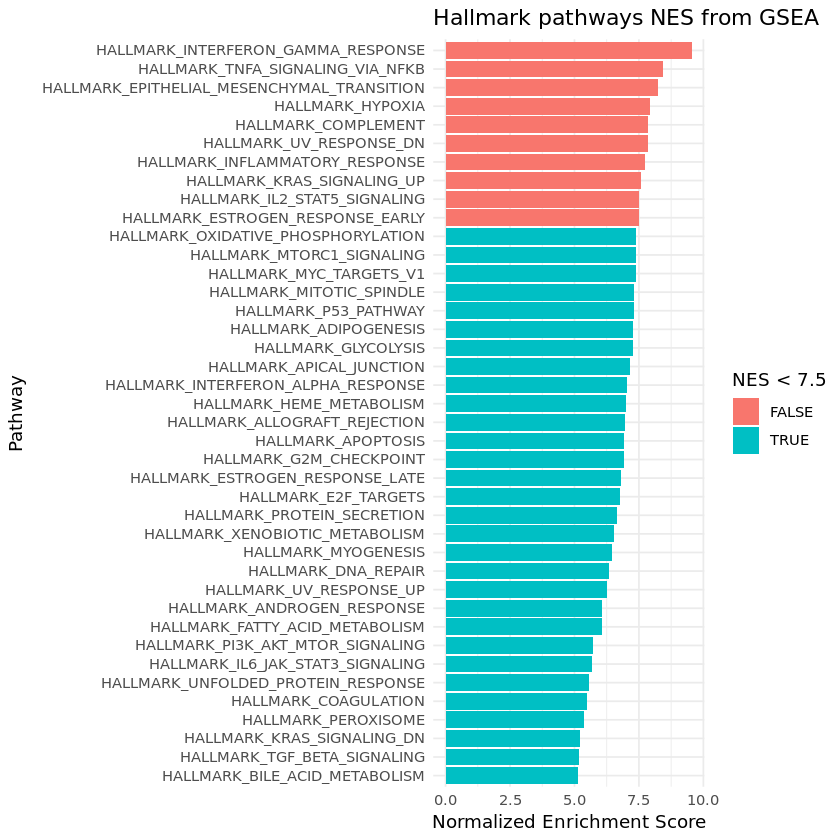

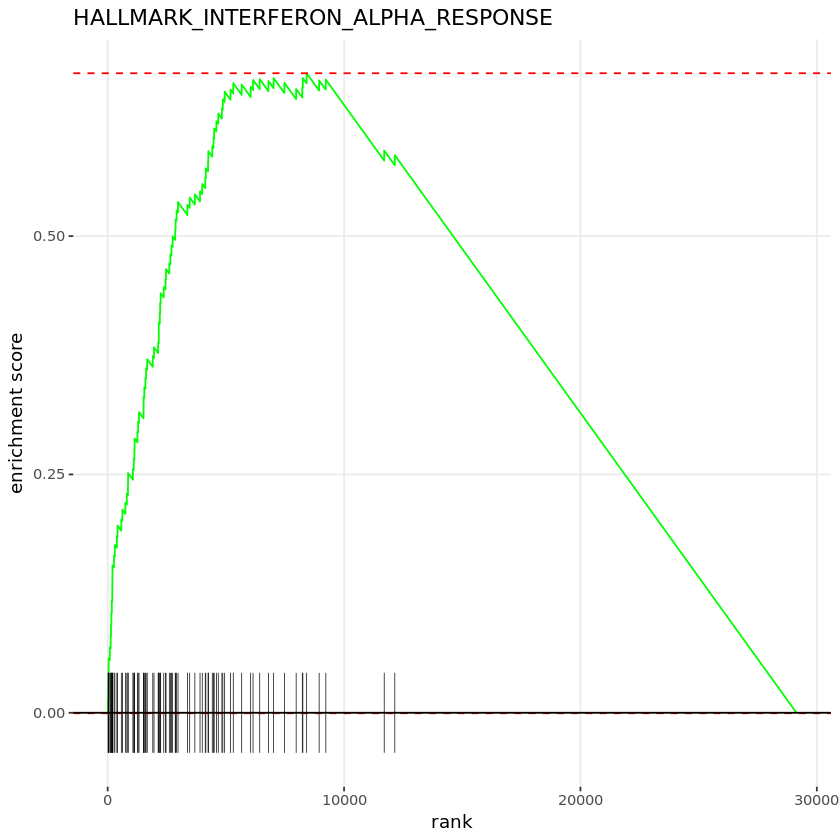

In [24]:
ggplot(fgseaResTidy, aes(reorder(pathway, NES), NES)) +
  geom_col(aes(fill=padj<0.05)) +
  coord_flip() +
  labs(x="Pathway", y="Normalized Enrichment Score",
       title="Hallmark pathways NES from GSEA") + 
  theme_minimal()

# only plot the top 20 pathways

ggplot(fgseaResTidy %>% filter(padj < 0.05) %>% head(n= 40), aes(reorder(pathway, NES), NES)) +
  geom_col(aes(fill= NES < 7.5)) +
  coord_flip() +
  labs(x="Pathway", y="Normalized Enrichment Score",
       title="Hallmark pathways NES from GSEA") + 
  theme_minimal()

plotEnrichment(fgsea_sets[["HALLMARK_INTERFERON_ALPHA_RESPONSE"]],
               ranks) + labs(title="HALLMARK_INTERFERON_ALPHA_RESPONSE")

In [25]:
macro.genes %>%
  dplyr::filter(group == "0") %>% # 0 --> responder
  arrange(desc(logFC), desc(auc)) %>%
  head(n = 10)

feature    group avgExpr  logFC    statistic auc       pval         
1  FKBP5      0     2.732508 2.100639 4022669   0.8416013  0.000000e+00
2  SRGAP1     0     1.691652 1.409482 3677126   0.7693085 5.683494e-278
3  ZBTB16     0     1.384449 1.318958 3550952   0.7429113 3.470344e-293
4  PDE4D      0     1.587393 1.256912 3413205   0.7140925 1.488293e-189
5  CPM        0     1.606350 1.192461 3442054   0.7201282 3.185767e-183
6  ELMO1      0     2.708633 1.152557 3567804   0.7464368 1.753251e-178
7  MAN1A1     0     1.648896 1.145733 3419182   0.7153431 3.546351e-168
8  PID1       0     1.233155 1.139642 3407626   0.7129254 2.454141e-236
9  AKAP13     0     3.034684 1.082242 3607425   0.7547262 1.044344e-187
10 CSGALNACT1 0     1.086083 1.014424 3342312   0.6992605 8.093941e-223
   padj          pct_in   pct_out  
1   0.000000e+00 82.38806 27.375946
2  2.069928e-274 63.38308 14.213625
3  1.685199e-289 50.94527  2.817494
4  1.667804e-186 53.63184 14.928511
5  2.730015e-180 58.55721 20.353238
6  1.110494e-175 85.27363 60.807401
7  1.913453e-165 60.29851 24.432296
8  5.107418e-233 46.21891  4.037006
9  1.086715e-184 92.48756 71.152229
10 1.473907e-219 42.73632  3.027754

FKBP5         SRGAP1         AKAP13          ELMO1         ZBTB16 
     0.8416013      0.7693085      0.7547262      0.7464368      0.7429113 
           CPM         MAN1A1          PDE4D           PID1          CELF2 
     0.7201282      0.7153431      0.7140925      0.7129254      0.7076023 
         ABCC4     CSGALNACT1         PABPC1            FOS           AREG 
     0.7020675      0.6992605      0.6983428      0.6973452      0.6942577 
         IRAK3          HDAC9         STK17B         CCSER1        LDLRAD4 
     0.6907567      0.6880202      0.6860073      0.6856730      0.6798449 
       CTTNBP2           AFF3           CCNH           LMNA          USP53 
     0.6781982      0.6715472      0.6701896      0.6695517      0.6689952 
       PSTPIP2       ARHGAP24         TBXAS1           NFIA          NHSL1 
     0.6650051      0.6640023      0.6636807      0.6598223      0.6592745 
          INSR         IMMP2L           CD55           FOSB         SLC1A3 
     0.6572673      0.6554773      0.6550414      0.6548339      0.6541517 
        MS4A4E        FILIP1L          ACSL1         S100A6        HERPUD1 
     0.6540665      0.6526769      0.6502633      0.6481290      0.6477624 
         PDE3B          PLCG2          NR4A1          MAML3     ST6GALNAC3 
     0.6462933      0.6444945      0.6437138      0.6435401      0.6430833 
      NAALADL2         ZBTB20         SLC9A9         SRGAP2          FOXN3 
     0.6389098      0.6356023      0.6351738      0.6348429      0.6340801 
    AC020916.1          SYTL3         SPTLC2         MED13L          FOXP1 
     0.6323943      0.6322841      0.6321742      0.6318111      0.6315327 
         CCND3          ZFP36           RFX3           PDK4          F13A1 
     0.6312959      0.6300231      0.6297215      0.6296395      0.6292979 
           ADK         EEF1A1         ATP2B1         P2RY14           RERE 
     0.6279310      0.6277549      0.6264397      0.6262589      0.6250076 
          FGD4          PDE7B         PIK3R5        TSC22D3           AOAH 
     0.6243506      0.6240664      0.6234482      0.6231492      0.6209585 
          CHKA           EMP1          CD163          HIPK3           GAS7 
     0.6207702      0.6185430      0.6181970      0.6180895      0.6172709 
         S100P           MRC1          MYO1D          SSBP2            DCN 
     0.6164923      0.6164345      0.6146684      0.6141670      0.6139507 
         PALD1            EZR           PTEN        TSC22D2         TIPARP 
     0.6134109      0.6132370      0.6132127      0.6128178      0.6122097 
         PHF20          FBLN1         MT-ND3         MAP2K1          XYLT1 
     0.6115603      0.6108833      0.6104472      0.6100420      0.6095622 
          HPGD          SPIDR           THRB         KIF13B           LRBA 
     0.6095576      0.6095076      0.6090351      0.6086314      0.6083205 
         KRT19          MAST4         IQGAP2           ELF1          HCLS1 
     0.6082536      0.6080662      0.6073789      0.6072055      0.6069848 
          EPS8          NR4A3          SMAP2        STARD13        PLA2G4A 
     0.6065445      0.6064989      0.6063964      0.6058436      0.6057228 
    AL163541.1          PELI2           SSH2           MCL1          RASA2 
     0.6056612      0.6053470      0.6052967      0.6051044      0.6049063 
       IL13RA1          SYAP1          NEDD9          LYVE1        CSNK1A1 
     0.6047773      0.6042314      0.6028170      0.6027790      0.6027162 
         PELI1            CFD         MPPED2        TNFAIP3           KLF7 
     0.6015532      0.6014120      0.6012427      0.6011576      0.6011385 
         ANXA1        DENND4A          MEF2A         CAMK1D         PLXNA2 
     0.6006944      0.6005749      0.6002593      0.6001151      0.6001053 
       SERINC5         ABLIM1          RPL41          ADIRF          DISC1 
     0.5999025      0.5997464      0.5992045      0.5990195      0.5983162 
         PARD3         GAREM1         MT-CYB         ANKS

Warning message in fgsea(fgsea_sets, stats = ranks, nperm = 1000):
“You are trying to run fgseaSimple. It is recommended to use fgseaMultilevel. To run fgseaMultilevel, you need to remove the nperm argument in the fgsea function call.”
Warning message in preparePathwaysAndStats(pathways, stats, minSize, maxSize, gseaParam, :
“There are ties in the preranked stats (3.58% of the list).
The order of those tied genes will be arbitrary, which may produce unexpected results.”
Warning message in preparePathwaysAndStats(pathways, stats, minSize, maxSize, gseaParam, :
“All values in the stats vector are greater than zero and scoreType is "std", maybe you should switch to scoreType = "pos".”


pathway                                    pval        padj        NES     
1 HALLMARK_UV_RESPONSE_DN                    0.001497006 0.007680492 4.680238
2 HALLMARK_ESTROGEN_RESPONSE_EARLY           0.001447178 0.007680492 3.934190
3 HALLMARK_ESTROGEN_RESPONSE_LATE            0.001477105 0.007680492 3.660485
4 HALLMARK_TNFA_SIGNALING_VIA_NFKB           0.001443001 0.007680492 3.590034
5 HALLMARK_ANDROGEN_RESPONSE                 0.001589825 0.007680492 2.975947
6 HALLMARK_EPITHELIAL_MESENCHYMAL_TRANSITION 0.001477105 0.007680492 2.955235
  size
1 136 
2 168 
3 150 
4 176 
5  94 
6 162

pathway                                    pval        padj       
1  HALLMARK_UV_RESPONSE_DN                    0.001497006 0.007680492
2  HALLMARK_ESTROGEN_RESPONSE_EARLY           0.001447178 0.007680492
3  HALLMARK_ESTROGEN_RESPONSE_LATE            0.001477105 0.007680492
4  HALLMARK_TNFA_SIGNALING_VIA_NFKB           0.001443001 0.007680492
5  HALLMARK_ANDROGEN_RESPONSE                 0.001589825 0.007680492
6  HALLMARK_EPITHELIAL_MESENCHYMAL_TRANSITION 0.001477105 0.007680492
7  HALLMARK_MYOGENESIS                        0.001506024 0.007680492
8  HALLMARK_KRAS_SIGNALING_UP                 0.001490313 0.007680492
9  HALLMARK_TGF_BETA_SIGNALING                0.001805054 0.007680492
10 HALLMARK_APICAL_JUNCTION                   0.001477105 0.007680492
11 HALLMARK_HEME_METABOLISM                   0.003076923 0.007680492
12 HALLMARK_GLYCOLYSIS                        0.003115265 0.007680492
13 HALLMARK_DNA_REPAIR                        0.002906977 0.007680492
14 HALLMARK_IL6_JAK_STAT3_SIGNALING           0.002421308 0.007680492
15 HALLMARK_INFLAMMATORY_RESPONSE             0.003030303 0.007680492
16 HALLMARK_ALLOGRAFT_REJECTION               0.003021148 0.007680492
17 HALLMARK_MTORC1_SIGNALING                  0.003225806 0.007680492
18 HALLMARK_HYPOXIA                           0.003076923 0.007680492
19 HALLMARK_COMPLEMENT                        0.003030303 0.007680492
20 HALLMARK_INTERFERON_ALPHA_RESPONSE         0.002659574 0.007680492
21 HALLMARK_INTERFERON_GAMMA_RESPONSE         0.003174603 0.007680492
22 HALLMARK_MITOTIC_SPINDLE                   0.004335260 0.009852864
23 HALLMARK_COAGULATION                       0.004792332 0.010418114
24 HALLMARK_PROTEIN_SECRETION                 0.005347594 0.011140820
25 HALLMARK_IL2_STAT5_SIGNALING               0.007342144 0.014684288
26 HALLMARK_PI3K_AKT_MTOR_SIGNALING           0.008042895 0.015467107
27 HALLMARK_G2M_CHECKPOINT                    0.009063444 0.016184722
28 HALLMARK_APOPTOSIS                         0.009036145 0.016184722
29 HALLMARK_UNFOLDED_PROTEIN_RESPONSE         0.016483516 0.028419856
30 HALLMARK_P53_PATHWAY                       0.024566474 0.039623345
31 HALLMARK_E2F_TARGETS                       0.024169184 0.039623345
32 HALLMARK_UV_RESPONSE_UP                    0.038575668 0.060274481
33 HALLMARK_PEROXISOME                        0.061497326 0.093177767
34 HALLMARK_FATTY_ACID_METABOLISM             0.065281899 0.096002793
35 HALLMARK_OXIDATIVE_PHOSPHORYLATION         0.068728522 0.098183603
36 HALLMARK_REACTIVE_OXYGEN_SPECIES_PATHWAY   0.089485459 0.124285359
37 HALLMARK_NOTCH_SIGNALING                   0.133187773 0.179983477
38 HALLMARK_KRAS_SIGNALING_DN                 0.176848875 0.232695888
39 HALLMARK_XENOBIOTIC_METABOLISM             0.194029851 0.248756219
40 HALLMARK_APICAL_SURFACE                    0.235081374 0.293851718
41 HALLMARK_MYC_TARGETS_V1                    0.248196248 0.299942477
42 HALLMARK_MYC_TARGETS_V2                    0.257950530 0.299942477
43 HALLMARK_ADIPOGENESIS                      0.254838710 0.299942477
44 HALLMARK_ANGIOGENESIS                      0.269315673 0.306040538
45 HALLMARK_WNT_BETA_CATENIN_SIGNALING        0.330376940 0.367085489
46 HALLMARK_CHOLESTEROL_HOMEOSTASIS           0.486552567 0.528861486
47 HALLMARK_BILE_ACID_METABOLISM              0.497340426 0.529085559
48 HALLMARK_HEDGEHOG_SIGNALING                0.523636364 0.540625109
49 HALLMARK_SPERMATOGENESIS                   0.529812606 0.540625109
50 HALLMARK_PANCREAS_BETA_CELLS               0.673640167 0.673640167
   NES        size
1   4.6802380 136 
2   3.9341904 168 
3   3.6604847 150 
4   3.5900341 176 
5   2.9759466  94 
6   2.9552348 162 
7   2.3440927 133 
8   2.3171588 152 
9   2.1557443  52 
10  2.0368473 160 
11 -2.6175020 150 
12 -2.6226204 166 
13 -2.7816652 134 
14 -3.0397095  69 
15 -3.3541175 155 
16 -3.5044125 147 
17 -3.6173831 181 
18 -3.7608886 165 
19 -3.9728583 155 
20 -7.3192566  88 
21 -8.5279975 177 
22  2.0671601 1

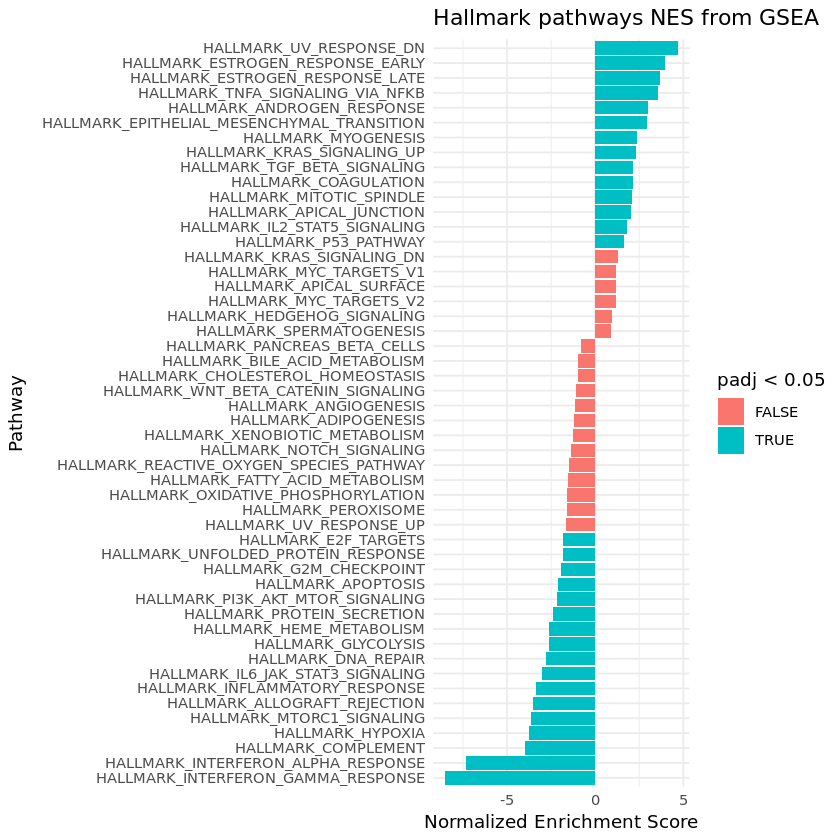

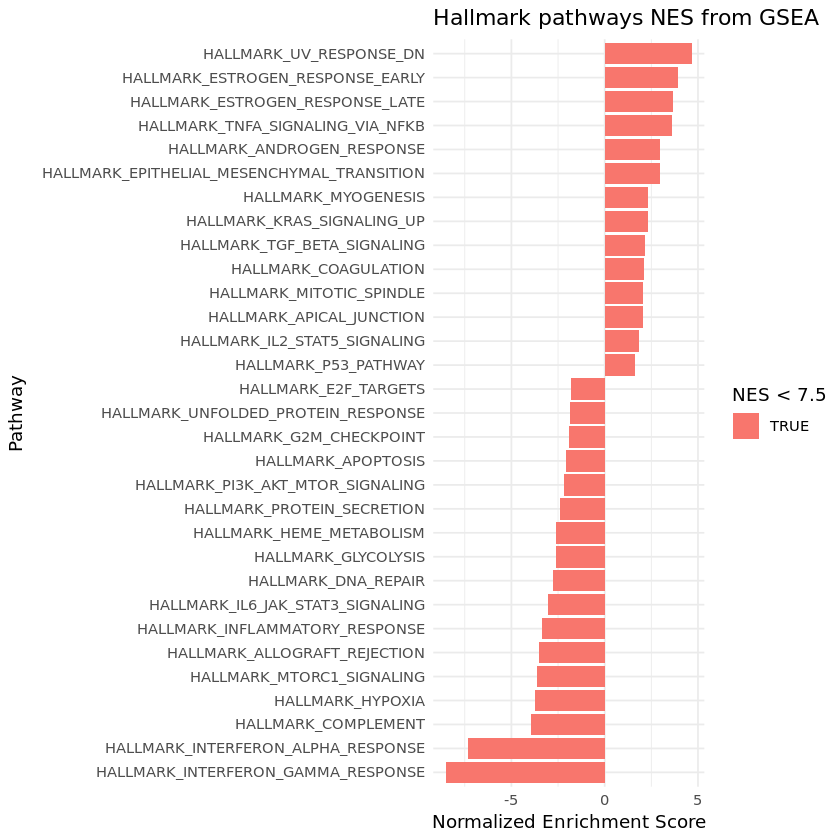

In [26]:
cluster0.genes<- macro.genes %>%
  dplyr::filter(group == "0") %>%
  arrange(desc(auc)) %>% 
  dplyr::select(feature, auc)

library(tibble)
ranks<- deframe(cluster0.genes)

ranks

fgseaRes<- fgsea(fgsea_sets, stats = ranks, nperm = 1000)

fgseaResTidy <- fgseaRes %>%
  as_tibble() %>%
  arrange(desc(NES))


fgseaResTidy %>% 
  dplyr::select(-leadingEdge, -ES, -nMoreExtreme) %>% 
  arrange(padj) %>% 
  head()

fgseaResTidy %>% 
  dplyr::select(-leadingEdge, -ES, -nMoreExtreme) %>% 
  arrange(padj)

ggplot(fgseaResTidy, aes(reorder(pathway, NES), NES)) +
  geom_col(aes(fill=padj<0.05)) +
  coord_flip() +
  labs(x="Pathway", y="Normalized Enrichment Score",
       title="Hallmark pathways NES from GSEA") + 
  theme_minimal()


# only plot the top 20 pathways

ggplot(fgseaResTidy %>% filter(padj < 0.05) %>% head(n= 40), aes(reorder(pathway, NES), NES)) +
  geom_col(aes(fill= NES < 7.5)) +
  coord_flip() +
  labs(x="Pathway", y="Normalized Enrichment Score",
       title="Hallmark pathways NES from GSEA") + 
  theme_minimal()

In [27]:
responder_df<- fgseaResTidy %>% 
  dplyr::select(-leadingEdge, -ES, -nMoreExtreme) %>% 
  arrange(padj)

In [29]:
write.csv(responder_df,"responder_NES.csv")
system(paste0("gsutil cp -r ", "responder_NES.csv ", bucket, "/cellranger_output_directory/bladder/gsea/"),intern=TRUE)


character(0)

In [30]:
macro.genes %>%
  dplyr::filter(group == "1") %>% # 1 --> Non responder
  arrange(desc(logFC), desc(auc)) %>%
  head(n = 10)



feature  group avgExpr  logFC    statistic auc       pval         
1  SLC16A10 1     2.701520 2.116288 3858252   0.8072028 8.148380e-308
2  SLC11A1  1     1.992056 1.626096 3727244   0.7797942 2.969880e-272
3  DMXL2    1     2.265407 1.494773 3715782   0.7773960 7.628468e-241
4  HIF1A    1     2.482177 1.388826 3670920   0.7680101 2.801014e-216
5  ABCA1    1     2.230867 1.274356 3546020   0.7418793 1.421396e-180
6  ERRFI1   1     1.467161 1.237780 3398441   0.7110036 8.878410e-184
7  FMNL2    1     2.416978 1.210633 3445113   0.7207681 4.158566e-148
8  GLUL     1     1.829929 1.190256 3453294   0.7224797 2.241032e-164
9  PDE4B    1     2.006844 1.181959 3399332   0.7111902 9.772053e-145
10 KCNMA1   1     1.973221 1.161835 3365932   0.7042024 3.013334e-137
   padj          pct_in   pct_out 
1  5.935280e-304 74.72666 21.29353
2  8.653043e-269 66.73675 16.81592
3  1.852192e-237 74.93692 33.88060
4  4.533908e-213 77.62826 47.51244
5  1.035345e-177 73.25484 42.18905
6  8.083792e-181 50.16821 12.18905
7  1.893187e-145 75.27334 47.86070
8  1.125771e-161 64.08747 30.89552
9  4.187037e-142 65.13877 36.06965
10 1.132603e-134 66.56854 30.79602

SLC16A10        SLC11A1          DMXL2          HIF1A          ABCA1 
     0.8072028      0.7797942      0.7773960      0.7680101      0.7418793 
        FNDC3B         RNF213           TYMP           GLUL          FMNL2 
     0.7411585      0.7301948      0.7260035      0.7224797      0.7207681 
        PARP14          PDE4B         ERRFI1         KCNMA1            FTL 
     0.7202830      0.7111902      0.7110036      0.7042024      0.6976692 
          CTSB          DOCK4         IFI44L         SLC2A3           TNS3 
     0.6949455      0.6919271      0.6906876      0.6896858      0.6896632 
           NPL            B2M         EPSTI1           SPP1           XAF1 
     0.6890823      0.6834345      0.6817808      0.6751277      0.6701133 
          GRB2           RALA           CTSL          MACF1           VPS8 
     0.6682617      0.6675415      0.6648292      0.6632285      0.6631623 
          EML4         PLA2G7         GPCPD1         MALAT1          CYTH1 
     0.6623268      0.6573477      0.6559337      0.6554650      0.6541171 
            GK        RAPGEF1          STAT1           NRP1          DOCK8 
     0.6477986      0.6473116      0.6451965      0.6433743      0.6411399 
         PMP22          ABCG1           TFRC          IGF2R          IFI27 
     0.6411200      0.6384918      0.6378008      0.6371172      0.6353793 
         MYO9B           SAT1          LITAF          IL2RA           PLAU 
     0.6336990      0.6335660      0.6335624      0.6326591      0.6325489 
         MOB3B       ATP6V0A1      HIF1A-AS3          PTPRJ          PLAUR 
     0.6323807      0.6300123      0.6273088      0.6262796      0.6218534 
         IFI30          BMP2K         SPTAN1         RNASE1           MXD1 
     0.6203349      0.6200271      0.6193733      0.6187909      0.6184107 
          WSB1          HLA-B           CTSC         SAMD9L           LRP1 
     0.6180881      0.6179758      0.6179618      0.6164071      0.6158795 
          GNB4          HLA-A          GPNMB           CD80           RBPJ 
     0.6146802      0.6130263      0.6130181      0.6126991      0.6126539 
         SNTB1          IFI44          ADAM9          TGFBI           MITF 
     0.6124832      0.6115550      0.6092778      0.6081597      0.6076797 
         WIPI1           ETV6        SIGLEC1           APOE          LIMK2 
     0.6075765      0.6068046      0.6066126      0.6060706      0.6055877 
          KYNU          PARP9           TOM1          CXCL3          STAT2 
     0.6046370      0.6043427      0.6039507      0.6032102      0.6028215 
         CLIP4            MX1          ARL4C          RUNX1        ZFYVE16 
     0.6026809      0.6019214      0.6018789      0.6013383      0.6006722 
         GNA13          NEAT1        STEAP1B           VCAN         DDX60L 
     0.6005583      0.6000368      0.5995851      0.5970386      0.5970144 
          CTSD           VAV3            QKI         FCGR2A          DRAM1 
     0.5968265      0.5966880      0.5963415      0.5959312      0.5959070 
       EPB41L3          CYTH4          PCSK5         ZNF331         HAVCR2 
     0.5957756      0.5957605      0.5955591      0.5947612      0.5945373 
         ADAM8            FN1           UBA6         PHF21A          SOAT1 
     0.5943660      0.5943181      0.5942060      0.5940626      0.5939092 
          PSAP          TANC2         SPRED1       TNFSF13B            ABR 
     0.5936350      0.5935340      0.5932026      0.5931677      0.5931176 
        PARP12          SGPL1         ARID5B           GSAP          ASAP1 
     0.5928553      0.5926660      0.5923672      0.5919750      0.5911648 
          DYSF        SLC11A2         FAM20A         RASAL2         TMSB10 
     0.5908073      0.5907934      0.5907185      0.5906155      0.5903046 
         N4BP1         ZNF438           NPC1       ARHGAP18           GPD2 
     0.5898551      0.5897779      0.5896339      0.5891468      0.5884472 
          GAB2          HLA-C          VAC14          

Warning message in fgsea(fgsea_sets, stats = ranks, nperm = 1000):
“You are trying to run fgseaSimple. It is recommended to use fgseaMultilevel. To run fgseaMultilevel, you need to remove the nperm argument in the fgsea function call.”
Warning message in preparePathwaysAndStats(pathways, stats, minSize, maxSize, gseaParam, :
“There are ties in the preranked stats (3.58% of the list).
The order of those tied genes will be arbitrary, which may produce unexpected results.”
Warning message in preparePathwaysAndStats(pathways, stats, minSize, maxSize, gseaParam, :
“All values in the stats vector are greater than zero and scoreType is "std", maybe you should switch to scoreType = "pos".”


pathway                            pval        padj        NES      size
1 HALLMARK_INTERFERON_GAMMA_RESPONSE 0.001477105 0.004451567 8.286202 177 
2 HALLMARK_INTERFERON_ALPHA_RESPONSE 0.001515152 0.004451567 7.111927  88 
3 HALLMARK_COMPLEMENT                0.001449275 0.004451567 4.578035 155 
4 HALLMARK_HYPOXIA                   0.001474926 0.004451567 4.190374 165 
5 HALLMARK_INFLAMMATORY_RESPONSE     0.001449275 0.004451567 3.906869 155 
6 HALLMARK_ALLOGRAFT_REJECTION       0.001468429 0.004451567 3.864420 147

pathway                                    pval        padj       
1  HALLMARK_INTERFERON_GAMMA_RESPONSE         0.001477105 0.004451567
2  HALLMARK_INTERFERON_ALPHA_RESPONSE         0.001515152 0.004451567
3  HALLMARK_COMPLEMENT                        0.001449275 0.004451567
4  HALLMARK_HYPOXIA                           0.001474926 0.004451567
5  HALLMARK_INFLAMMATORY_RESPONSE             0.001449275 0.004451567
6  HALLMARK_ALLOGRAFT_REJECTION               0.001468429 0.004451567
7  HALLMARK_MTORC1_SIGNALING                  0.001492537 0.004451567
8  HALLMARK_IL6_JAK_STAT3_SIGNALING           0.001602564 0.004451567
9  HALLMARK_HEME_METABOLISM                   0.001479290 0.004451567
10 HALLMARK_GLYCOLYSIS                        0.001483680 0.004451567
11 HALLMARK_DNA_REPAIR                        0.001481481 0.004451567
12 HALLMARK_PROTEIN_SECRETION                 0.001519757 0.004451567
13 HALLMARK_IL2_STAT5_SIGNALING               0.001483680 0.004451567
14 HALLMARK_KRAS_SIGNALING_UP                 0.001470588 0.004451567
15 HALLMARK_PI3K_AKT_MTOR_SIGNALING           0.001508296 0.004451567
16 HALLMARK_APOPTOSIS                         0.001443001 0.004451567
17 HALLMARK_EPITHELIAL_MESENCHYMAL_TRANSITION 0.001447178 0.004451567
18 HALLMARK_G2M_CHECKPOINT                    0.001470588 0.004451567
19 HALLMARK_MITOTIC_SPINDLE                   0.002985075 0.006530825
20 HALLMARK_ANDROGEN_RESPONSE                 0.002949853 0.006530825
21 HALLMARK_TNFA_SIGNALING_VIA_NFKB           0.003086420 0.006530825
22 HALLMARK_ESTROGEN_RESPONSE_LATE            0.003067485 0.006530825
23 HALLMARK_ESTROGEN_RESPONSE_EARLY           0.003105590 0.006530825
24 HALLMARK_UV_RESPONSE_DN                    0.003134796 0.006530825
25 HALLMARK_MYOGENESIS                        0.006024096 0.012048193
26 HALLMARK_UV_RESPONSE_UP                    0.008955224 0.017221584
27 HALLMARK_UNFOLDED_PROTEIN_RESPONSE         0.010526316 0.018796992
28 HALLMARK_E2F_TARGETS                       0.010294118 0.018796992
29 HALLMARK_TGF_BETA_SIGNALING                0.012658228 0.021824531
30 HALLMARK_PEROXISOME                        0.021052632 0.035087719
31 HALLMARK_FATTY_ACID_METABOLISM             0.029850746 0.046641791
32 HALLMARK_COAGULATION                       0.028919330 0.046641791
33 HALLMARK_REACTIVE_OXYGEN_SPECIES_PATHWAY   0.032948929 0.049922620
34 HALLMARK_P53_PATHWAY                       0.035820896 0.052206929
35 HALLMARK_APICAL_JUNCTION                   0.036544850 0.052206929
36 HALLMARK_XENOBIOTIC_METABOLISM             0.052478134 0.072886297
37 HALLMARK_ANGIOGENESIS                      0.057432432 0.077611395
38 HALLMARK_OXIDATIVE_PHOSPHORYLATION         0.064327485 0.084641428
39 HALLMARK_NOTCH_SIGNALING                   0.081081081 0.103950104
40 HALLMARK_ADIPOGENESIS                      0.104477612 0.130597015
41 HALLMARK_MYC_TARGETS_V1                    0.162280702 0.197903295
42 HALLMARK_BILE_ACID_METABOLISM              0.181126332 0.215626585
43 HALLMARK_CHOLESTEROL_HOMEOSTASIS           0.186195827 0.216506775
44 HALLMARK_WNT_BETA_CATENIN_SIGNALING        0.276948590 0.314714307
45 HALLMARK_MYC_TARGETS_V2                    0.289672544 0.321858382
46 HALLMARK_PANCREAS_BETA_CELLS               0.511545293 0.556027492
47 HALLMARK_APICAL_SURFACE                    0.543209877 0.577882847
48 HALLMARK_KRAS_SIGNALING_DN                 0.599415205 0.624390838
49 HALLMARK_HEDGEHOG_SIGNALING                0.687179487 0.701203558
50 HALLMARK_SPERMATOGENESIS                   0.845549738 0.845549738
   NES        size
1   8.2862019 177 
2   7.1119267  88 
3   4.5780346 155 
4   4.1903744 165 
5   3.9068690 155 
6   3.8644204 147 
7   3.6543882 181 
8   3.5111237  69 
9   2.8975381 150 
10  2.8220187 166 
11  2.7722170 134 
12  2.7177629  93 
13  2.5513350 166 
14  2.5183458 152 
15  2.4953744  94 
16  2.4827648 145 
17  2.4531533 162 
18  2.2108572 152 
19  2.2014759 181 
20 -2.4617877  94 
21 -2.8641472 176 
22 -3.5808241 1

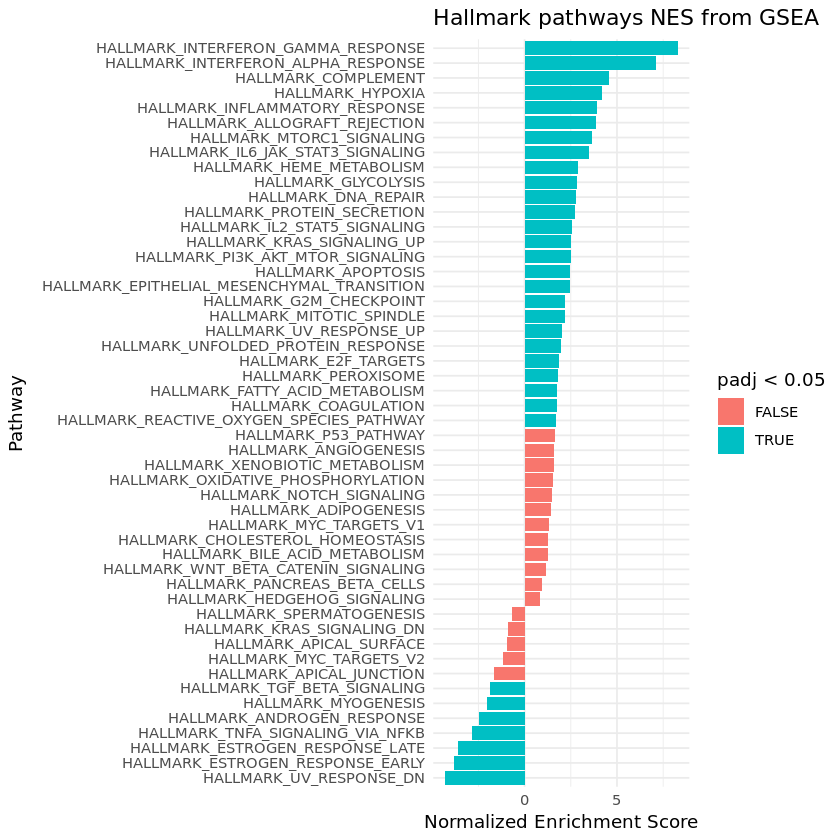

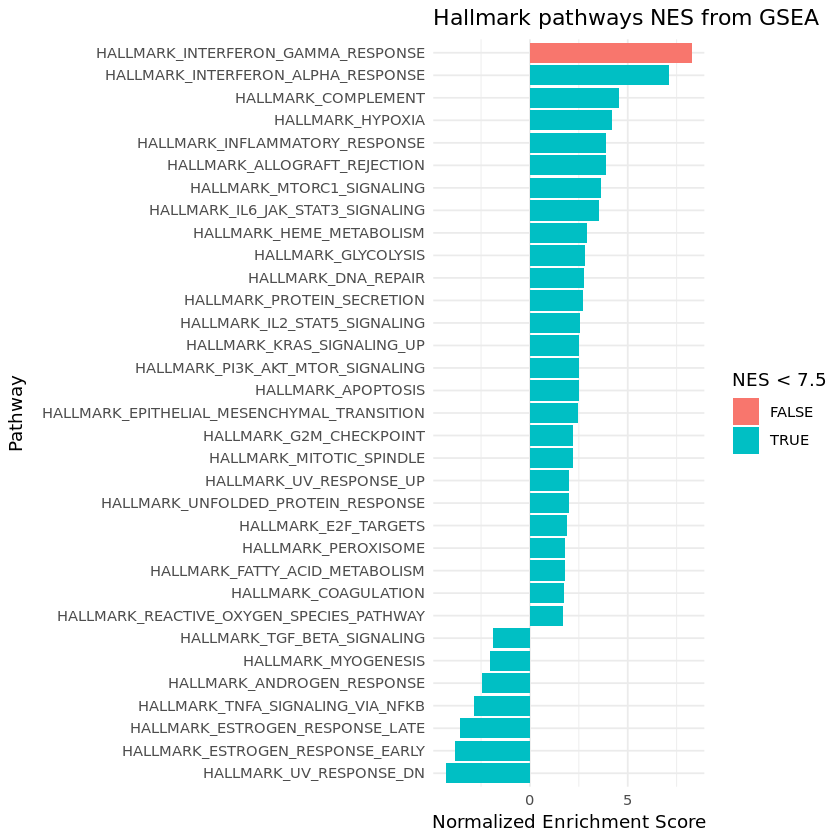

In [31]:
cluster0.genes<- macro.genes %>%
  dplyr::filter(group == "1") %>%
  arrange(desc(auc)) %>% 
  dplyr::select(feature, auc)

library(tibble)
ranks<- deframe(cluster0.genes)

ranks

fgseaRes<- fgsea(fgsea_sets, stats = ranks, nperm = 1000)

fgseaResTidy <- fgseaRes %>%
  as_tibble() %>%
  arrange(desc(NES))


fgseaResTidy %>% 
  dplyr::select(-leadingEdge, -ES, -nMoreExtreme) %>% 
  arrange(padj) %>% 
  head()

fgseaResTidy %>% 
  dplyr::select(-leadingEdge, -ES, -nMoreExtreme) %>% 
  arrange(padj)

ggplot(fgseaResTidy, aes(reorder(pathway, NES), NES)) +
  geom_col(aes(fill=padj<0.05)) +
  coord_flip() +
  labs(x="Pathway", y="Normalized Enrichment Score",
       title="Hallmark pathways NES from GSEA") + 
  theme_minimal()


# only plot the top 20 pathways

ggplot(fgseaResTidy %>% filter(padj < 0.05) %>% head(n= 40), aes(reorder(pathway, NES), NES)) +
  geom_col(aes(fill= NES < 7.5)) +
  coord_flip() +
  labs(x="Pathway", y="Normalized Enrichment Score",
       title="Hallmark pathways NES from GSEA") + 
  theme_minimal()

In [32]:
nonresponder_df<- fgseaResTidy %>% 
  dplyr::select(-leadingEdge, -ES, -nMoreExtreme) %>% 
  arrange(padj)

In [33]:
nonresponder_df

pathway                                    pval        padj       
1  HALLMARK_INTERFERON_GAMMA_RESPONSE         0.001477105 0.004451567
2  HALLMARK_INTERFERON_ALPHA_RESPONSE         0.001515152 0.004451567
3  HALLMARK_COMPLEMENT                        0.001449275 0.004451567
4  HALLMARK_HYPOXIA                           0.001474926 0.004451567
5  HALLMARK_INFLAMMATORY_RESPONSE             0.001449275 0.004451567
6  HALLMARK_ALLOGRAFT_REJECTION               0.001468429 0.004451567
7  HALLMARK_MTORC1_SIGNALING                  0.001492537 0.004451567
8  HALLMARK_IL6_JAK_STAT3_SIGNALING           0.001602564 0.004451567
9  HALLMARK_HEME_METABOLISM                   0.001479290 0.004451567
10 HALLMARK_GLYCOLYSIS                        0.001483680 0.004451567
11 HALLMARK_DNA_REPAIR                        0.001481481 0.004451567
12 HALLMARK_PROTEIN_SECRETION                 0.001519757 0.004451567
13 HALLMARK_IL2_STAT5_SIGNALING               0.001483680 0.004451567
14 HALLMARK_KRAS_SIGNALING_UP                 0.001470588 0.004451567
15 HALLMARK_PI3K_AKT_MTOR_SIGNALING           0.001508296 0.004451567
16 HALLMARK_APOPTOSIS                         0.001443001 0.004451567
17 HALLMARK_EPITHELIAL_MESENCHYMAL_TRANSITION 0.001447178 0.004451567
18 HALLMARK_G2M_CHECKPOINT                    0.001470588 0.004451567
19 HALLMARK_MITOTIC_SPINDLE                   0.002985075 0.006530825
20 HALLMARK_ANDROGEN_RESPONSE                 0.002949853 0.006530825
21 HALLMARK_TNFA_SIGNALING_VIA_NFKB           0.003086420 0.006530825
22 HALLMARK_ESTROGEN_RESPONSE_LATE            0.003067485 0.006530825
23 HALLMARK_ESTROGEN_RESPONSE_EARLY           0.003105590 0.006530825
24 HALLMARK_UV_RESPONSE_DN                    0.003134796 0.006530825
25 HALLMARK_MYOGENESIS                        0.006024096 0.012048193
26 HALLMARK_UV_RESPONSE_UP                    0.008955224 0.017221584
27 HALLMARK_UNFOLDED_PROTEIN_RESPONSE         0.010526316 0.018796992
28 HALLMARK_E2F_TARGETS                       0.010294118 0.018796992
29 HALLMARK_TGF_BETA_SIGNALING                0.012658228 0.021824531
30 HALLMARK_PEROXISOME                        0.021052632 0.035087719
31 HALLMARK_FATTY_ACID_METABOLISM             0.029850746 0.046641791
32 HALLMARK_COAGULATION                       0.028919330 0.046641791
33 HALLMARK_REACTIVE_OXYGEN_SPECIES_PATHWAY   0.032948929 0.049922620
34 HALLMARK_P53_PATHWAY                       0.035820896 0.052206929
35 HALLMARK_APICAL_JUNCTION                   0.036544850 0.052206929
36 HALLMARK_XENOBIOTIC_METABOLISM             0.052478134 0.072886297
37 HALLMARK_ANGIOGENESIS                      0.057432432 0.077611395
38 HALLMARK_OXIDATIVE_PHOSPHORYLATION         0.064327485 0.084641428
39 HALLMARK_NOTCH_SIGNALING                   0.081081081 0.103950104
40 HALLMARK_ADIPOGENESIS                      0.104477612 0.130597015
41 HALLMARK_MYC_TARGETS_V1                    0.162280702 0.197903295
42 HALLMARK_BILE_ACID_METABOLISM              0.181126332 0.215626585
43 HALLMARK_CHOLESTEROL_HOMEOSTASIS           0.186195827 0.216506775
44 HALLMARK_WNT_BETA_CATENIN_SIGNALING        0.276948590 0.314714307
45 HALLMARK_MYC_TARGETS_V2                    0.289672544 0.321858382
46 HALLMARK_PANCREAS_BETA_CELLS               0.511545293 0.556027492
47 HALLMARK_APICAL_SURFACE                    0.543209877 0.577882847
48 HALLMARK_KRAS_SIGNALING_DN                 0.599415205 0.624390838
49 HALLMARK_HEDGEHOG_SIGNALING                0.687179487 0.701203558
50 HALLMARK_SPERMATOGENESIS                   0.845549738 0.845549738
   NES        size
1   8.2862019 177 
2   7.1119267  88 
3   4.5780346 155 
4   4.1903744 165 
5   3.9068690 155 
6   3.8644204 147 
7   3.6543882 181 
8   3.5111237  69 
9   2.8975381 150 
10  2.8220187 166 
11  2.7722170 134 
12  2.7177629  93 
13  2.5513350 166 
14  2.5183458 152 
15  2.4953744  94 
16  2.4827648 145 
17  2.4531533 162 
18  2.2108572 152 
19  2.2014759 181 
20 -2.4617877  94 
21 -2.8641472 176 
22 -3.5808241 1

In [34]:
write.csv(nonresponder_df,"nonresponder_NES.csv")
system(paste0("gsutil cp -r ", "nonresponder_NES.csv ", bucket, "/cellranger_output_directory/bladder/gsea/"),intern=TRUE)


character(0)

In [55]:
library(escape)
GS.hallmark <- getGeneSets(library = "H")
GS.hallmark

In [57]:
new_list = list('ALDH3A1', 'BST2',
                'CA2', 'CCNA1' ,'CD59', 'CXCL1' ,'CXCL10' ,'DAZ1' ,'DCN' ,'FLJ20035', 'FLJ38348', 'G1P2' ,
                'G1P3' ,'GALC', 'HERC6', 'HLA-B', 'HLA-G', 'HSD17B1' ,'IFI27',
                'IFI35', 'IFI44' ,'IFI44L' ,'IFIT1' ,'IFIT3', 'IFITM1', 'IGF2',
                'IRF7', 'LAMP3', 'LGALS3BP' ,'LY6E' ,'MCL1', 'MX1','MX2', 'OAS1',
                'OAS3', 'OASL' ,'PLSCR1', 'RAP2C' ,'ROBO1' ,'SERPINB2' ,'SH3YL1' ,'SLC6A15' ,'STAT1', 
                'THBS1' ,'TIMP3' ,'TncRNA', 'TRIM14' ,'USP18', 'ZNF273')
GS.hallmark$GENE_SET_49_IRDS <- new_list
GS.hallmark

$`HALLMARK-ADIPOGENESIS`
  [1] "ABCA1"    "ABCB8"    "ACAA2"    "ACADL"    "ACADM"    "ACADS"   
  [7] "ACLY"     "ACO2"     "ACOX1"    "ADCY6"    "ADIG"     "ADIPOQ"  
 [13] "ADIPOR2"  "AGPAT3"   "AIFM1"    "AK2"      "ALDH2"    "ALDOA"   
 [19] "ANGPT1"   "ANGPTL4"  "APLP2"    "APOE"     "ARAF"     "ARL4A"   
 [25] "ATL2"     "ATP1B3"   "ATP5PO"   "BAZ2A"    "BCKDHA"   "BCL2L13" 
 [31] "BCL6"     "C3"       "CAT"      "CAVIN1"   "CAVIN2"   "CCNG2"   
 [37] "CD151"    "CD302"    "CD36"     "CDKN2C"   "CHCHD10"  "CHUK"    
 [43] "CIDEA"    "CMBL"     "CMPK1"    "COL15A1"  "COL4A1"   "COQ3"    
 [49] "COQ5"     "COQ9"     "COX6A1"   "COX7B"    "COX8A"    "CPT2"    
 [55] "CRAT"     "CS"       "CYC1"     "CYP4B1"   "DBT"      "DDT"     
 [61] "DECR1"    "DGAT1"    "DHCR7"    "DHRS7"    "DHRS7B"   "DLAT"    
 [67] "DLD"      "DNAJB9"   "DNAJC15"  "DRAM2"    "ECH1"     "ECHS1"   
 [73] "ELMOD3"   "ELOVL6"   "ENPP2"    "EPHX2"    "ESRRA"    "ESYT1"   
 [79] "ETFB"     "FABP4"    "FAH"      "FZD4"     "G3BP2"    "GADD45A" 
 [85] "GBE1"     "GHITM"    "GPAM"     "GPAT4"    "GPD2"     "GPHN"    
 [91] "GPX3"     "GPX4"     "GRPEL1"   "HADH"     "HIBCH"    "HSPB8"   
 [97] "IDH1"     "IDH3A"    "IDH3G"    "IFNGR1"   "IMMT"     "ITGA7"   
[103] "ITIH5"    "ITSN1"    "JAGN1"    "LAMA4"    "LEP"      "LIFR"    
[109] "LIPE"     "LPCAT3"   "LPL"      "LTC4S"    "MAP4K3"   "MCCC1"   
[115] "MDH2"     "ME1"      "MGLL"     "MGST3"    "MIGA2"    "MRAP"    
[121] "MRPL15"   "MTARC2"   "MTCH2"    "MYLK"     "NABP1"    "NDUFA5"  
[127] "NDUFAB1"  "NDUFB7"   "NDUFS3"   "NKIRAS1"  "NMT1"     "OMD"     
[133] "ORM1"     "PDCD4"    "PEMT"     "PEX14"    "PFKFB3"   "PFKL"    
[139] "PGM1"     "PHLDB1"   "PHYH"     "PIM3"     "PLIN2"    "POR"     
[145] "PPARG"    "PPM1B"    "PPP1R15B" "PRDX3"    "PREB"     "PTCD3"   
[151] "PTGER3"   "QDPR"     "RAB34"    "REEP5"    "REEP6"    "RETN"    
[157] "RETSAT"   "RIOK3"    "RMDN3"    "RNF11"    "RREB1"    "RTN3"    
[163] "SAMM50"   "SCARB1"   "SCP2"     "SDHB"     "SDHC"     "SLC19A1" 
[169] "SLC1A5"   "SLC25A1"  "SLC25A10" "SLC27A1"  "SLC5A6"   "SLC66A3" 
[175] "SNCG"     "SOD1"     "SORBS1"   "SOWAHC"   "SPARCL1"  "SQOR"    
[181] "SSPN"     "STAT5A"   "STOM"     "SUCLG1"   "SULT1A1"  "TALDO1"  
[187] "TANK"     "TKT"      "TOB1"     "TST"      "UBC"      "UBQLN1"  
[193] "UCK1"     "UCP2"     "UQCR10"   "UQCR11"   "UQCRC1"   "UQCRQ"   
[199] "VEGFB"    "YWHAG"   

$`HALLMARK-ALLOGRAFT-REJECTION`
  [1] "AARS1"    "ABCE1"    "ABI1"     "ACHE"     "ACVR2A"   "AKT1"    
  [7] "APBB1"    "B2M"      "BCAT1"    "BCL10"    "BCL3"     "BRCA1"   
 [13] "C2"       "CAPG"     "CARTPT"   "CCL11"    "CCL13"    "CCL19"   
 [19] "CCL2"     "CCL22"    "CCL4"     "CCL5"     "CCL7"     "CCND2"   
 [25] "CCND3"    "CCR1"     "CCR2"     "CCR5"     "CD1D"     "CD2"     
 [31] "CD247"    "CD28"     "CD3D"     "CD3E"     "CD3G"     "CD4"     
 [37] "CD40"     "CD40LG"   "CD47"     "CD7"      "CD74"     "CD79A"   
 [43] "CD80"     "CD86"     "CD8A"     "CD8B"     "CD96"     "CDKN2A"  
 [49] "CFP"      "CRTAM"    "CSF1"     "CSK"      "CTSS"     "CXCL13"  
 [55] "CXCL9"    "CXCR3"    "DARS1"    "DEGS1"    "DYRK3"    "EGFR"    
 [61] "EIF3A"    "EIF3D"    "EIF3J"    "EIF4G3"   "EIF5A"    "ELANE"   
 [67] "ELF4"     "EREG"     "ETS1"     "F2"       "F2R"      "FAS"     
 [73] "FASLG"    "FCGR2B"   "FGR"      "FLNA"     "FYB1"     "GALNT1"  
 [79] "GBP2"     "GCNT1"    "GLMN"     "GPR65"    "GZMA"     "GZMB"    
 [85] "HCLS1"    "HDAC9"    "HIF1A"    "HLA-A"    "HLA-DMA"  "HLA-DMB" 
 [91] "HLA-DOA"  "HLA-DOB"  "HLA-DQA1" "HLA-DRA"  "HLA-E"    "HLA-G"   
 [97] "ICAM1"    "ICOSLG"   "IFNAR2"   "IFNG"     "IFNGR1"   "IFNGR2"  
[103] "IGSF6"    "IKBKB"    "IL10"     "IL11"     "IL12A"    "IL12B"   
[109] "IL12RB1"  "IL13"     "IL15"     "IL16"     "IL18"     "IL18RAP" 
[115] "IL1B"     "IL2"      "IL27RA"   "IL2RA"    "IL2RB"    "IL2RG"   
[121] "IL4"      "IL4R"     "IL6"      "IL7"      "IL9"      "INHBA"   
[127] "INHBB"    "IRF4"   

In [67]:
enrichment.scores <- escape.matrix(macro, 
                                   gene.sets = GS.hallmark, 
                                   groups = 5000, 
                                   min.size = 5)

[1] "Using sets of 5000 cells. Running 1 times."


ERROR: Error in (function (classes, fdef, mtable) : unable to find an inherited method for function ‘gsva’ for signature ‘"missing", "missing"’


In [65]:
macro@assays

$RNA
Assay data with 14568 features for 4388 cells
First 10 features:
 AL627309.5, LINC01409, LINC01128, LINC00115, FAM41C, SAMD11, NOC2L,
KLHL17, PLEKHN1, HES4 


In [ ]:
cluster0.genes<- macro.genes %>%
  dplyr::filter(group == "1") %>%
  arrange(desc(auc)) %>% 
  dplyr::select(feature, auc)


In [44]:
macro@assays

$RNA
Assay data with 14568 features for 4388 cells
First 10 features:
 AL627309.5, LINC01409, LINC01128, LINC00115, FAM41C, SAMD11, NOC2L,
KLHL17, PLEKHN1, HES4 


In [ ]:
heatmapEnrichment(macro, 
                  group.by = group,
                  gene.set.use = rownames(test$pathway)[1:12],
                  assay = "escape.ssGSEA")

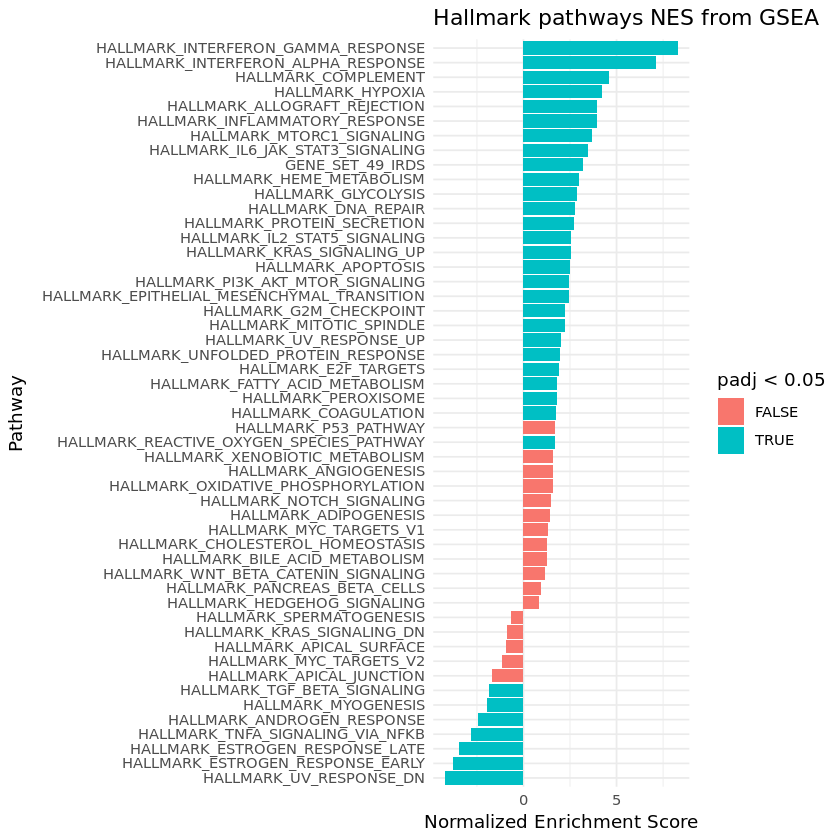

In [48]:
ggplot(fgseaResTidy, aes(reorder(pathway, NES), NES)) +
  geom_col(aes(fill=padj<0.05)) +
  coord_flip() +
  labs(x="Pathway", y="Normalized Enrichment Score",
       title="Hallmark pathways NES from GSEA") + 
  theme_minimal()


In [50]:
test<- fgseaResTidy %>% 
  dplyr::select(-leadingEdge, -ES, -nMoreExtreme) %>% 
  arrange(padj)

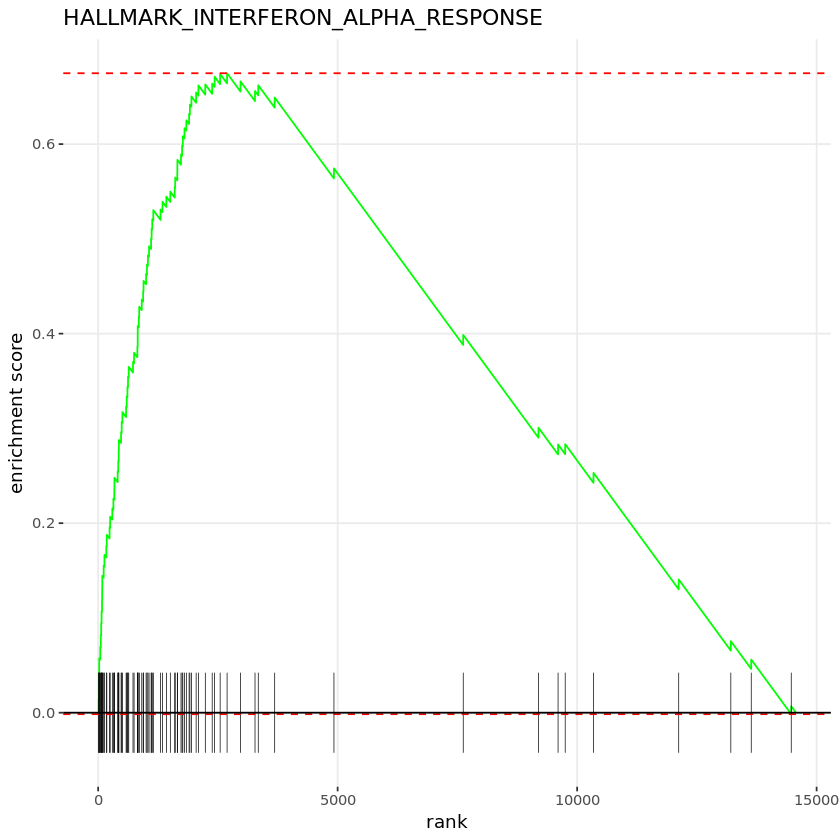

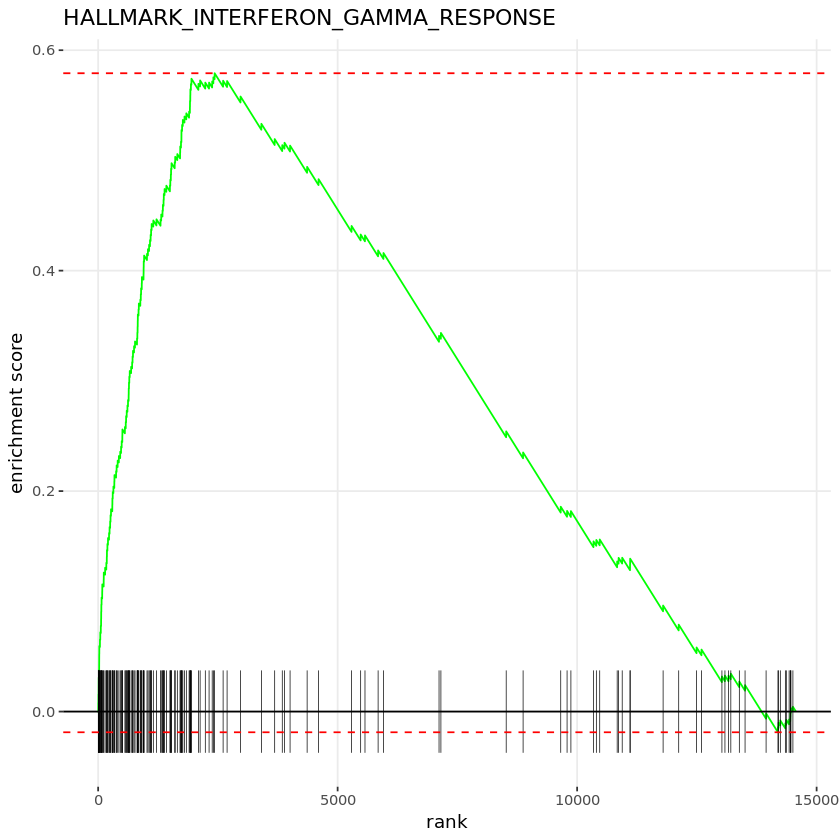

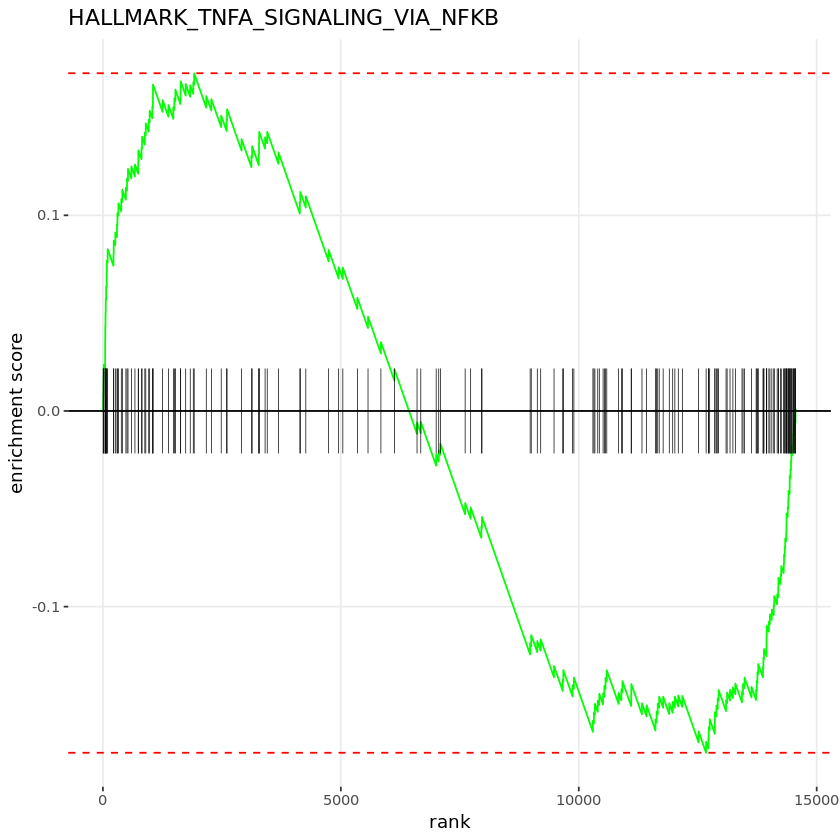

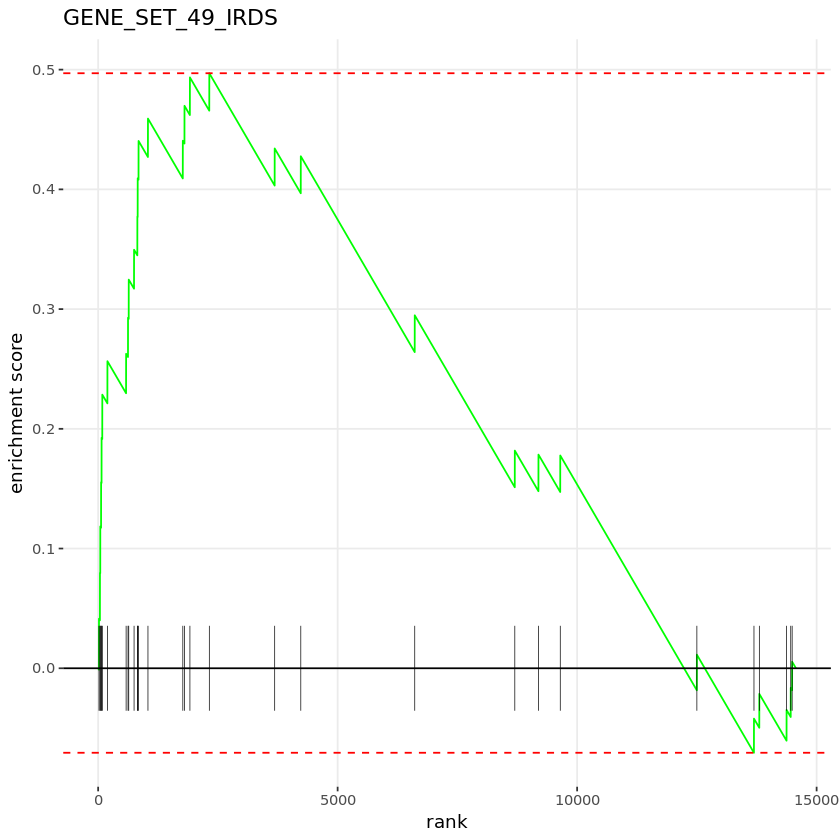

In [44]:
plotEnrichment(fgsea_sets[["HALLMARK_INTERFERON_ALPHA_RESPONSE"]],
               ranks) + labs(title="HALLMARK_INTERFERON_ALPHA_RESPONSE")


plotEnrichment(fgsea_sets[["HALLMARK_INTERFERON_GAMMA_RESPONSE"]],
               ranks) + labs(title="HALLMARK_INTERFERON_GAMMA_RESPONSE")


plotEnrichment(fgsea_sets[["HALLMARK_TNFA_SIGNALING_VIA_NFKB"]],
               ranks) + labs(title="HALLMARK_TNFA_SIGNALING_VIA_NFKB")


plotEnrichment(fgsea_sets[["GENE_SET_49_IRDS"]],
               ranks) + labs(title="GENE_SET_49_IRDS")

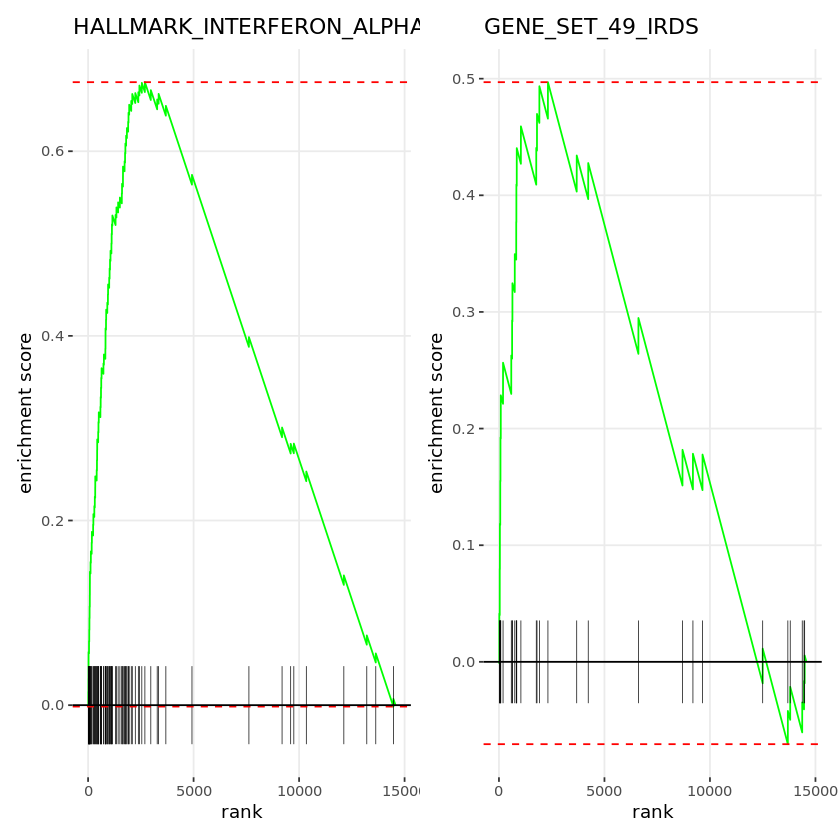

In [46]:
p1<- plotEnrichment(fgsea_sets[["HALLMARK_INTERFERON_ALPHA_RESPONSE"]],
               ranks) + labs(title="HALLMARK_INTERFERON_ALPHA_RESPONSE")


p2<- plotEnrichment(fgsea_sets[["GENE_SET_49_IRDS"]],
               ranks) + labs(title="GENE_SET_49_IRDS")

p1+p2

In [ ]:
p1 <- gseaplot(edo2, geneSetID = 1, by = "runningScore", title = edo2$Description[1])
p2 <- gseaplot(edo2, geneSetID = 1, by = "preranked", title = edo2$Description[1])
p3 <- gseaplot(edo2, geneSetID = 1, title = edo2$Description[1])
cowplot::plot_grid(p1, p2, p3, ncol=1, labels=LETTERS[1:3])

In [39]:
fgseaResTidy <- fgseaRes %>%
  as_tibble() %>%
  arrange(desc(NES))


In [41]:
cluster1.genes<- macro.genes %>%
  dplyr::filter(group == "1") %>%
  arrange(desc(auc)) %>% 
  dplyr::select(feature, auc)

library(tibble)
ranks<- deframe(cluster1.genes)

head(ranks)

SLC16A10   SLC11A1     DMXL2     HIF1A     ABCA1    FNDC3B 
0.8072028 0.7797942 0.7773960 0.7680101 0.7418793 0.7411585

In [35]:
#if (!require("BiocManager", quietly = TRUE))
#    install.packages("BiocManager")

#BiocManager::install("org.Hs.eg.db")

# load
library('org.Hs.eg.db')

Loading required package: AnnotationDbi

Loading required package: stats4

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:dplyr’:

    combine, intersect, setdiff, union


The following object is masked from ‘package:SeuratObject’:

    intersect


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, grepl, intersect, is.unsorted, lapply, Map, mapply,
    match, mget, order, paste, pmax, pmax.int, pmin, pmin.int,
    Position, rank, rbind, Reduce, rownames, sapply, setdiff, sort,
    table, tapply, union, unique, unsplit, which.max, which.min


Loading required package: Biobase

Welcome to Bioconductor

    Vignettes contain introductory material; view with
    'browseVigne

In [37]:
MygeneList <-data.frame(ranks)
symbols<- rownames(MygeneList)
MygeneList

ranks    
SLC16A10   0.8072028
SLC11A1    0.7797942
DMXL2      0.7773960
HIF1A      0.7680101
ABCA1      0.7418793
FNDC3B     0.7411585
RNF213     0.7301948
TYMP       0.7260035
GLUL       0.7224797
FMNL2      0.7207681
PARP14     0.7202830
PDE4B      0.7111902
ERRFI1     0.7110036
KCNMA1     0.7042024
FTL        0.6976692
CTSB       0.6949455
DOCK4      0.6919271
IFI44L     0.6906876
SLC2A3     0.6896858
TNS3       0.6896632
NPL        0.6890823
B2M        0.6834345
EPSTI1     0.6817808
SPP1       0.6751277
XAF1       0.6701133
GRB2       0.6682617
RALA       0.6675415
CTSL       0.6648292
MACF1      0.6632285
VPS8       0.6631623
⋮          ⋮        
NHSL1      0.3407255
NFIA       0.3401777
TBXAS1     0.3363193
ARHGAP24   0.3359977
PSTPIP2    0.3349949
USP53      0.3310048
LMNA       0.3304483
CCNH       0.3298104
AFF3       0.3284528
CTTNBP2    0.3218018
LDLRAD4    0.3201551
CCSER1     0.3143270
STK17B     0.3139927
HDAC9      0.3119798
IRAK3      0.3092433
AREG       0.3057423
FOS        0.3026548
PABPC1     0.3016572
CSGALNACT1 0.3007395
ABCC4      0.2979325
CELF2      0.2923977
PID1       0.2870746
PDE4D      0.2859075
MAN1A1     0.2846569
CPM        0.2798718
ZBTB16     0.2570887
ELMO1      0.2535632
AKAP13     0.2452738
SRGAP1     0.2306915
FKBP5      0.1583987

In [38]:
gene_df<-data.frame(mapIds(org.Hs.eg.db, symbols, 'ENTREZID', 'SYMBOL'))
names(gene_df)[1] <- "ENTERZID"
gene_df

'select()' returned 1:many mapping between keys and columns



ENTERZID
SLC16A10   117247  
SLC11A1    6556    
DMXL2      23312   
HIF1A      3091    
ABCA1      19      
FNDC3B     64778   
RNF213     57674   
TYMP       1890    
GLUL       2752    
FMNL2      114793  
PARP14     54625   
PDE4B      5142    
ERRFI1     54206   
KCNMA1     3778    
FTL        2512    
CTSB       1508    
DOCK4      9732    
IFI44L     10964   
SLC2A3     6515    
TNS3       64759   
NPL        80896   
B2M        567     
EPSTI1     94240   
SPP1       6696    
XAF1       54739   
GRB2       2885    
RALA       5898    
CTSL       1514    
MACF1      23499   
VPS8       23355   
⋮          ⋮       
NHSL1      57224   
NFIA       4774    
TBXAS1     6916    
ARHGAP24   83478   
PSTPIP2    9050    
USP53      54532   
LMNA       4000    
CCNH       902     
AFF3       3899    
CTTNBP2    83992   
LDLRAD4    753     
CCSER1     401145  
STK17B     9262    
HDAC9      9734    
IRAK3      11213   
AREG       374     
FOS        2353    
PABPC1     26986   
CSGALNACT1 55790   
ABCC4      10257   
CELF2      10659   
PID1       55022   
PDE4D      5144    
MAN1A1     4121    
CPM        1368    
ZBTB16     7704    
ELMO1      9844    
AKAP13     11214   
SRGAP1     57522   
FKBP5      2289

In [39]:
#which(is.na(gene_df$ENTERZID))
sum(is.na(gene_df$ENTERZID))

[1] 1531

In [41]:
library(tidyr)
gene_df <- gene_df %>% drop_na() # 14568 --> 13037
gene_df


Attaching package: ‘tidyr’


The following object is masked from ‘package:S4Vectors’:

    expand




ENTERZID
SLC16A10   117247  
SLC11A1    6556    
DMXL2      23312   
HIF1A      3091    
ABCA1      19      
FNDC3B     64778   
RNF213     57674   
TYMP       1890    
GLUL       2752    
FMNL2      114793  
PARP14     54625   
PDE4B      5142    
ERRFI1     54206   
KCNMA1     3778    
FTL        2512    
CTSB       1508    
DOCK4      9732    
IFI44L     10964   
SLC2A3     6515    
TNS3       64759   
NPL        80896   
B2M        567     
EPSTI1     94240   
SPP1       6696    
XAF1       54739   
GRB2       2885    
RALA       5898    
CTSL       1514    
MACF1      23499   
VPS8       23355   
⋮          ⋮       
NHSL1      57224   
NFIA       4774    
TBXAS1     6916    
ARHGAP24   83478   
PSTPIP2    9050    
USP53      54532   
LMNA       4000    
CCNH       902     
AFF3       3899    
CTTNBP2    83992   
LDLRAD4    753     
CCSER1     401145  
STK17B     9262    
HDAC9      9734    
IRAK3      11213   
AREG       374     
FOS        2353    
PABPC1     26986   
CSGALNACT1 55790   
ABCC4      10257   
CELF2      10659   
PID1       55022   
PDE4D      5144    
MAN1A1     4121    
CPM        1368    
ZBTB16     7704    
ELMO1      9844    
AKAP13     11214   
SRGAP1     57522   
FKBP5      2289

In [42]:
gene_df$gene<- rownames(gene_df)
MygeneList$gene <- rownames(MygeneList)

In [44]:
library(dplyr)
result <- inner_join(gene_df, MygeneList, by = "gene")
result


ENTERZID gene       ranks    
1     117247   SLC16A10   0.8072028
2     6556     SLC11A1    0.7797942
3     23312    DMXL2      0.7773960
4     3091     HIF1A      0.7680101
5     19       ABCA1      0.7418793
6     64778    FNDC3B     0.7411585
7     57674    RNF213     0.7301948
8     1890     TYMP       0.7260035
9     2752     GLUL       0.7224797
10    114793   FMNL2      0.7207681
11    54625    PARP14     0.7202830
12    5142     PDE4B      0.7111902
13    54206    ERRFI1     0.7110036
14    3778     KCNMA1     0.7042024
15    2512     FTL        0.6976692
16    1508     CTSB       0.6949455
17    9732     DOCK4      0.6919271
18    10964    IFI44L     0.6906876
19    6515     SLC2A3     0.6896858
20    64759    TNS3       0.6896632
21    80896    NPL        0.6890823
22    567      B2M        0.6834345
23    94240    EPSTI1     0.6817808
24    6696     SPP1       0.6751277
25    54739    XAF1       0.6701133
26    2885     GRB2       0.6682617
27    5898     RALA       0.6675415
28    1514     CTSL       0.6648292
29    23499    MACF1      0.6632285
30    23355    VPS8       0.6631623
⋮     ⋮        ⋮          ⋮        
13008 57224    NHSL1      0.3407255
13009 4774     NFIA       0.3401777
13010 6916     TBXAS1     0.3363193
13011 83478    ARHGAP24   0.3359977
13012 9050     PSTPIP2    0.3349949
13013 54532    USP53      0.3310048
13014 4000     LMNA       0.3304483
13015 902      CCNH       0.3298104
13016 3899     AFF3       0.3284528
13017 83992    CTTNBP2    0.3218018
13018 753      LDLRAD4    0.3201551
13019 401145   CCSER1     0.3143270
13020 9262     STK17B     0.3139927
13021 9734     HDAC9      0.3119798
13022 11213    IRAK3      0.3092433
13023 374      AREG       0.3057423
13024 2353     FOS        0.3026548
13025 26986    PABPC1     0.3016572
13026 55790    CSGALNACT1 0.3007395
13027 10257    ABCC4      0.2979325
13028 10659    CELF2      0.2923977
13029 55022    PID1       0.2870746
13030 5144     PDE4D      0.2859075
13031 4121     MAN1A1     0.2846569
13032 1368     CPM        0.2798718
13033 7704     ZBTB16     0.2570887
13034 9844     ELMO1      0.2535632
13035 11214    AKAP13     0.2452738
13036 57522    SRGAP1     0.2306915
13037 2289     FKBP5      0.1583987

In [45]:
MygeneList <- setNames( result$ranks, (result$ENTERZID))


In [47]:
geneList<- MygeneList

In [48]:
require(enrichplot)
library(msigdbr)

Loading required package: enrichplot




Attaching package: ‘enrichplot’


The following object is masked from ‘package:ggpubr’:

    color_palette




In [50]:
m_t2g <- msigdbr(species = "Homo sapiens", category = "H") %>% 
  dplyr::select(gs_name, entrez_gene)
head(m_t2g)

gs_name               entrez_gene
1 HALLMARK_ADIPOGENESIS    19      
2 HALLMARK_ADIPOGENESIS 11194      
3 HALLMARK_ADIPOGENESIS 10449      
4 HALLMARK_ADIPOGENESIS    33      
5 HALLMARK_ADIPOGENESIS    34      
6 HALLMARK_ADIPOGENESIS    35

In [52]:
new_list = c('ALDH3A1', 'BST2',
                'CA2', 'CCNA1' ,'CD59', 'CXCL1' ,'CXCL10' ,'DAZ1' ,'DCN' ,'FLJ20035', 'FLJ38348', 'G1P2' ,
                'G1P3' ,'GALC', 'HERC6', 'HLA-B', 'HLA-G', 'HSD17B1' ,'IFI27',
                'IFI35', 'IFI44' ,'IFI44L' ,'IFIT1' ,'IFIT3', 'IFITM1', 'IGF2',
                'IRF7', 'LAMP3', 'LGALS3BP' ,'LY6E' ,'MCL1', 'MX1','MX2', 'OAS1',
                'OAS3', 'OASL' ,'PLSCR1', 'RAP2C' ,'ROBO1' ,'SERPINB2' ,'SH3YL1' ,'SLC6A15' ,'STAT1', 
                'THBS1' ,'TIMP3' ,'TncRNA', 'TRIM14' ,'USP18', 'ZNF273')
gene_df<-data.frame(mapIds(org.Hs.eg.db, new_list, 'ENTREZID', 'SYMBOL'))
names(gene_df)[1] <- "entrez_gene"
gene_df$gs_name<- rep("GENE_SET_49_IRDS",49)

col_order <- c("gs_name","entrez_gene")
gene_df<- gene_df[, col_order]
rownames(gene_df)<-NULL
gene_df


'select()' returned 1:1 mapping between keys and columns



gs_name          entrez_gene
1  GENE_SET_49_IRDS 218        
2  GENE_SET_49_IRDS 684        
3  GENE_SET_49_IRDS 760        
4  GENE_SET_49_IRDS 8900       
5  GENE_SET_49_IRDS 966        
6  GENE_SET_49_IRDS 2919       
7  GENE_SET_49_IRDS 3627       
8  GENE_SET_49_IRDS 1617       
9  GENE_SET_49_IRDS 1634       
10 GENE_SET_49_IRDS NA         
11 GENE_SET_49_IRDS NA         
12 GENE_SET_49_IRDS NA         
13 GENE_SET_49_IRDS NA         
14 GENE_SET_49_IRDS 2581       
15 GENE_SET_49_IRDS 55008      
16 GENE_SET_49_IRDS 3106       
17 GENE_SET_49_IRDS 3135       
18 GENE_SET_49_IRDS 3292       
19 GENE_SET_49_IRDS 3429       
20 GENE_SET_49_IRDS 3430       
21 GENE_SET_49_IRDS 10561      
22 GENE_SET_49_IRDS 10964      
23 GENE_SET_49_IRDS 3434       
24 GENE_SET_49_IRDS 3437       
25 GENE_SET_49_IRDS 8519       
26 GENE_SET_49_IRDS 3481       
27 GENE_SET_49_IRDS 3665       
28 GENE_SET_49_IRDS 27074      
29 GENE_SET_49_IRDS 3959       
30 GENE_SET_49_IRDS 4061       
31 GENE_SET_49_IRDS 4170       
32 GENE_SET_49_IRDS 4599       
33 GENE_SET_49_IRDS 4600       
34 GENE_SET_49_IRDS 4938       
35 GENE_SET_49_IRDS 4940       
36 GENE_SET_49_IRDS 8638       
37 GENE_SET_49_IRDS 5359       
38 GENE_SET_49_IRDS 57826      
39 GENE_SET_49_IRDS 6091       
40 GENE_SET_49_IRDS 5055       
41 GENE_SET_49_IRDS 26751      
42 GENE_SET_49_IRDS 55117      
43 GENE_SET_49_IRDS 6772       
44 GENE_SET_49_IRDS 7057       
45 GENE_SET_49_IRDS 7078       
46 GENE_SET_49_IRDS NA         
47 GENE_SET_49_IRDS 9830       
48 GENE_SET_49_IRDS 11274      
49 GENE_SET_49_IRDS 10793

In [54]:
m_t2g<- rbind(m_t2g,gene_df)

In [55]:
require(ggplot2)
require(clusterProfiler)
require(org.Hs.eg.db)
require(enrichplot)

Loading required package: clusterProfiler

clusterProfiler v4.11.0.002  For help: https://yulab-smu.top/biomedical-knowledge-mining-book/

If you use clusterProfiler in published research, please cite:
T Wu, E Hu, S Xu, M Chen, P Guo, Z Dai, T Feng, L Zhou, W Tang, L Zhan, X Fu, S Liu, X Bo, and G Yu. clusterProfiler 4.0: A universal enrichment tool for interpreting omics data. The Innovation. 2021, 2(3):100141


Attaching package: ‘clusterProfiler’


The following object is masked from ‘package:AnnotationDbi’:

    select


The following object is masked from ‘package:IRanges’:

    slice


The following object is masked from ‘package:S4Vectors’:

    rename


The following object is masked from ‘package:stats’:

    filter




In [56]:
em <- GSEA(geneList,nPerm = 10000 ,TERM2GENE = m_t2g, pvalueCutoff = 0.05,verbose = FALSE)


Warning message in .GSEA(geneList = geneList, exponent = exponent, minGSSize = minGSSize, :
“We do not recommend using nPerm parameter incurrent and future releases”
Warning message in fgsea(pathways = geneSets, stats = geneList, nperm = nPerm, minSize = minGSSize, :
“You are trying to run fgseaSimple. It is recommended to use fgseaMultilevel. To run fgseaMultilevel, you need to remove the nperm argument in the fgsea function call.”
Warning message in preparePathwaysAndStats(pathways, stats, minSize, maxSize, gseaParam, :
“There are ties in the preranked stats (2.69% of the list).
The order of those tied genes will be arbitrary, which may produce unexpected results.”
Warning message in preparePathwaysAndStats(pathways, stats, minSize, maxSize, gseaParam, :
“All values in the stats vector are greater than zero and scoreType is "std", maybe you should switch to scoreType = "pos".”


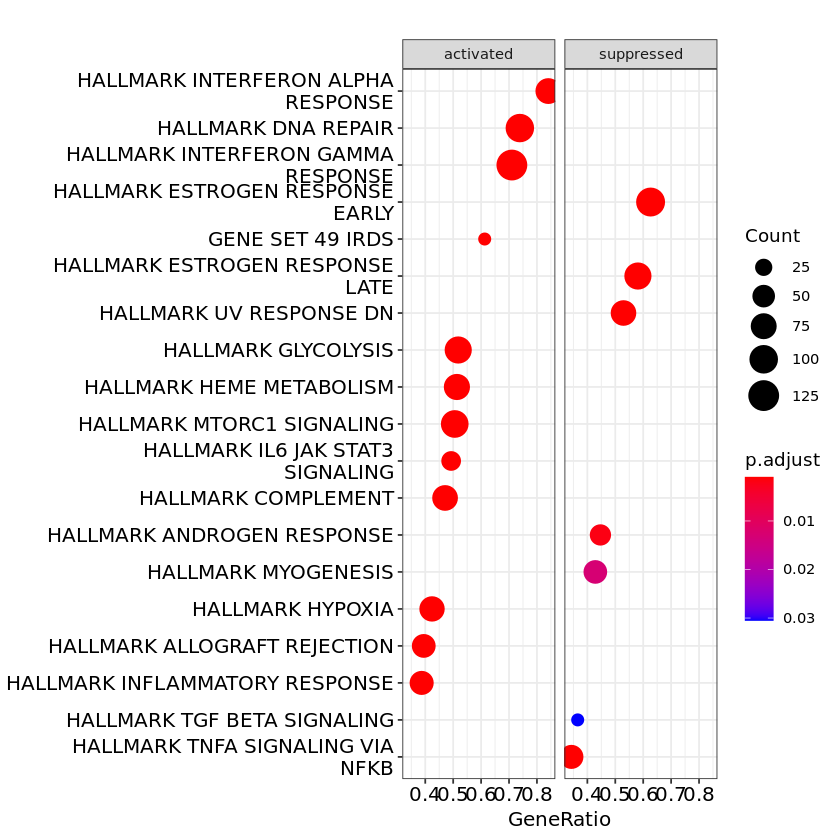

In [58]:
dotplot(em,showCategory=12,split=".sign")+facet_grid(~.sign)##

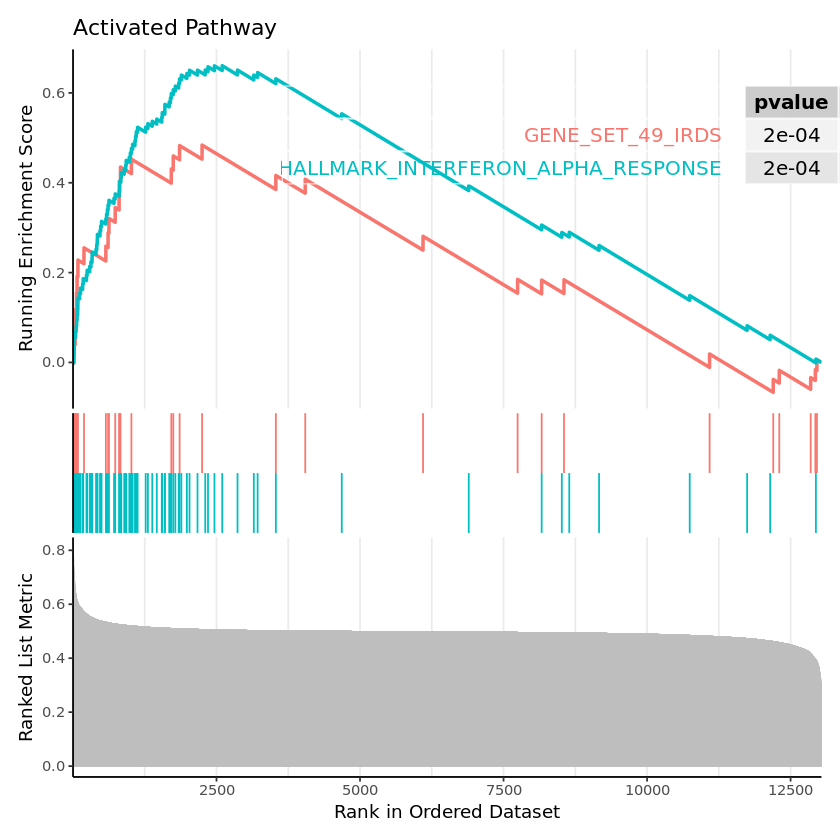

In [60]:
gseaplot2(em, geneSetID = c(2,9), title ="Activated Pathway",pvalue_table=T)

Fig 3_d

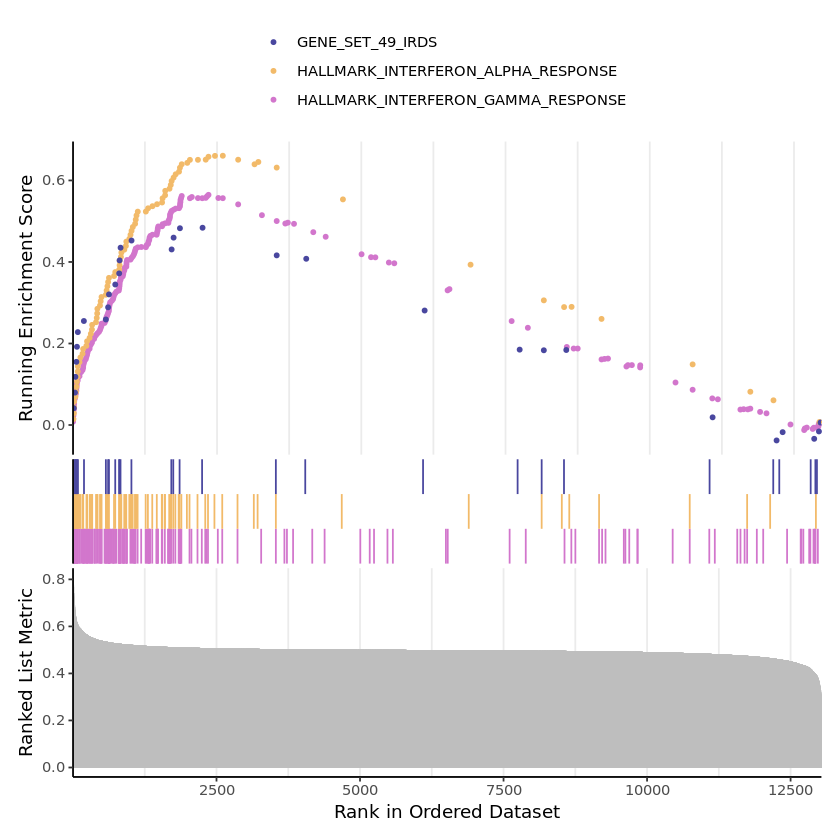

In [63]:
p<-gseaplot2(em, geneSetID = c(1,2,9), pvalue_table = FALSE,
          color = c("#49479F", "#f2ba69", "#d276cc"), ES_geom = "dot") # + 
        #(theme_classic()) theme_classic() + 
p[[1]] <- p[[1]]+theme(legend.position = "top",legend.direction = "vertical")
p

In [75]:
system(paste0("gsutil cp -r ", "nonresponder_gsea.png ", bucket, "/cellranger_output_directory/bladder/gsea/"),intern=TRUE)


character(0)